## Breast Cancer Study - EDA

### The Big Picture Question

To better understand a patient’s potential outcome after being diagnosed with a genetic disorder or disease, it is important to understand how specific features of their disease and aberrations in their genetic make-up, as well the type of treatment they receive could be affecting them and be targeted. By identifying a relationship(s) between disease state factors, such as treatment type, tumor characteristics, and changes in gene expression, the patients’ outcome from breast cancer could potentially be predicted and improved. Here, the relationships between these features will be examined to aid in further analyses

In [1]:
#load necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy.stats import ttest_ind

In [2]:
os.getcwd()

'/Users/shannonballard/Springboard/Springboard_Capstone_2'

In [3]:
path="/Users/shannonballard/Springboard/Springboard_Capstone_2"
os.chdir(path) 

In [4]:
#load the data into pandas df and print the first five rows
nki_bc = pd.read_csv('NKI_breast_cancer.csv')
nki_bc.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [5]:
#Do not need patient, ID, or barcode columns - remove from df and save as new file
nki_bc = nki_bc.drop(["Patient", "ID", "barcode"], axis=1)

nki_bc.to_csv('nki_bc_cleaned.csv')


In [6]:
nki_bc.head()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,43,0,14.817248,14.817248,0,0,1,1,25,0,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,48,0,14.261465,14.261465,0,0,0,1,20,0,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,38,0,6.644764,6.644764,0,0,0,1,15,0,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,50,0,7.748118,7.748118,0,1,0,1,15,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,38,0,6.436687,6.318960,0,0,1,1,15,0,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [7]:
nki_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 1567 entries, age to AF067420
dtypes: float64(1556), int64(11)
memory usage: 3.3 MB


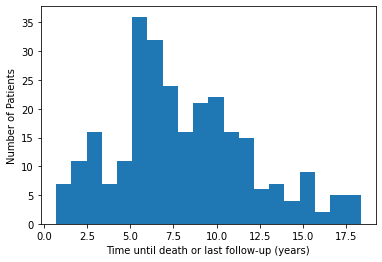

In [8]:
# Look at distribution of survival times in patients

_ = plt.hist(nki_bc.survival, bins=20)
_ = plt.xlabel('Time until death or last follow-up (years)')
_ = plt.ylabel('Number of Patients')

In [9]:
# What are minimum, mean, and maximum number of years in survival times?
nki_bc.survival.describe()

count    272.000000
mean       8.080609
std        3.904874
min        0.711841
25%        5.499738
50%        7.359343
75%       10.512662
max       18.340862
Name: survival, dtype: float64

### Dividing the data

The dataset does not include information for healthy individuals, which could have been used to compare not only survival times, but also gene expression information. However, the dataset does include whether or not the indiviuals survived ('eventdeath' variable). The dataset will be divided into those who survived (alive) and those who did not survive (death)

In [10]:
alive = nki_bc['eventdeath'] == 0
nki_bc_alive = nki_bc[alive]
event_a=nki_bc_alive['survival'].count()
print('alive at end of study n = ', event_a)

alive at end of study n =  195


In [11]:
death = nki_bc['eventdeath'] == 1
nki_bc_death = nki_bc[death]
event_d=nki_bc_death['survival'].count()
print('death at end of study n = ', event_d)

death at end of study n =  77


In [12]:
# Note that there are more individuals who survived than those who did not survive

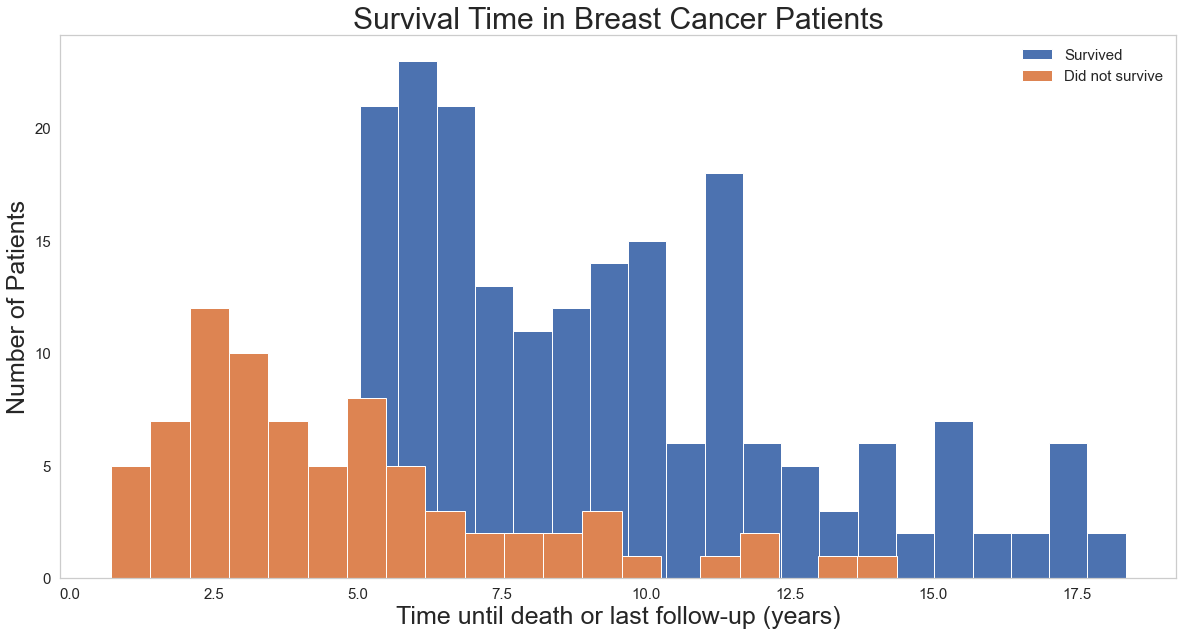

In [208]:
# Compare the distribution of survival time between alive and death
plt.figure(figsize=(20,10))
plt.hist(nki_bc_alive['survival'], bins=20, label='Survived')
plt.hist(nki_bc_death['survival'], bins=20, label='Did not survive')
plt.xlabel('Time until death or last follow-up (years)', fontsize = 25)
plt.ylabel('Number of Patients', fontsize = 25)
plt.title('Survival Time in Breast Cancer Patients', fontsize = 30)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(False)
plt.legend(loc='best', fontsize=15, facecolor='white', framealpha=0)
plt.savefig('Survival Time in Breast Cancer Patients.png', transparent=True)
plt.show()

In [14]:
nki_bc['eventdeath2'] = nki_bc['eventdeath'].replace([0,1], ['Survived', 'Did not survive'])

nki_bc.head()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,...,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,eventdeath2
0,43,0,14.817248,14.817248,0,0,1,1,25,0,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,Survived
1,48,0,14.261465,14.261465,0,0,0,1,20,0,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,Survived
2,38,0,6.644764,6.644764,0,0,0,1,15,0,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,Survived
3,50,0,7.748118,7.748118,0,1,0,1,15,1,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,Survived
4,38,0,6.436687,6.318960,0,0,1,1,15,0,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,Survived


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Survived v.s. Did not survive: t-test independent samples with Bonferroni correction, P_val=4.940e-22 stat=1.056e+01


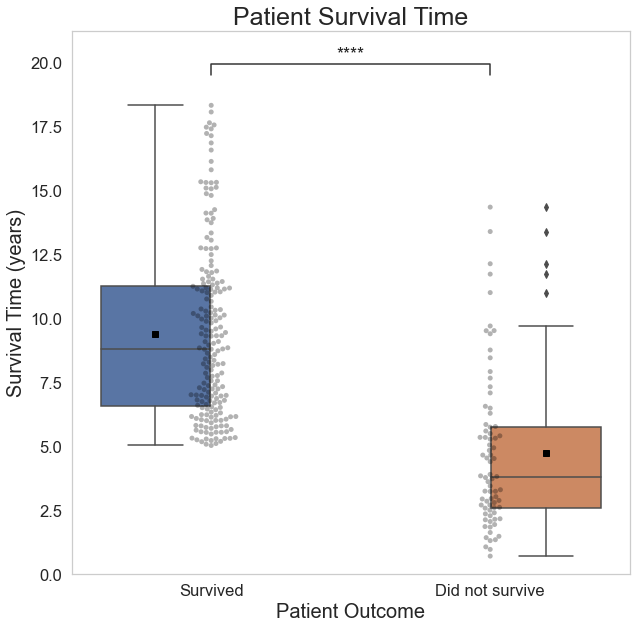

In [15]:
from statannot import add_stat_annotation

# Visualizing the mean, median, quartiles, and outliers for all idividuals, alive individuals, and death individuals

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='eventdeath2', y='survival', hue='eventdeath2', data=nki_bc, showmeans=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
ax.set(ylim=(0, 20))
sns.swarmplot(x='eventdeath2', y='survival', color='black', alpha = 0.3, data=nki_bc)
add_stat_annotation(ax, data=nki_bc, x='eventdeath2', y='survival', order=['Survived', 'Did not survive'],
                    box_pairs=[('Survived', 'Did not survive')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Patient Survival Time', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Patient Outcome', fontsize = 20)
plt.ylabel('Survival Time (years)', fontsize = 20)
ax.legend().set_visible(False)
plt.savefig('Patient Survival Time.png', transparent=True)

In [16]:
print(nki_bc_alive['survival'].mean())
print(nki_bc_death['survival'].mean())

9.404391097435898
4.728173597402598


Text(0, 0.5, 'Patient Survival Time (years)')

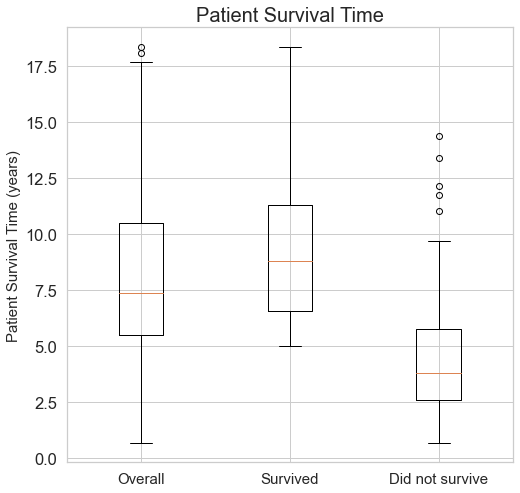

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.boxplot([nki_bc['survival'], nki_bc_alive['survival'], nki_bc_death['survival']], positions=[1, 2, 3])
ax.set_xticklabels(['Overall', 'Survived', 'Did not survive'], fontsize=15)
ax.set_title('Patient Survival Time', fontsize = 20)
ax.set_ylabel('Patient Survival Time (years)', fontsize=15)

In [18]:
# Is there a differece bewteen survival time between the 3 groups?
t, p = ttest_ind(nki_bc['survival'], nki_bc_alive['survival'], equal_var=False)
print("overall vs alive ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc['survival'], nki_bc_death['survival'], equal_var=False)
print("overall vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_alive['survival'], nki_bc_death['survival'], equal_var=False)
print("alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

overall vs alive ttest_ind:            t = -3.91016  p = 0.000106491
overall vs death ttest_ind:            t = 7.96014  p = 3.57105e-13
alive vs death ttest_ind:            t = 11.026  p = 3.55345e-21


#### There seem to be differences in survival times between the 3 groups

### Exploring relationships between variables - non-gene, continuous variables

The dataset contains both continuous and categorical variables. The continuous variables that are not levels of gene expression are examined below

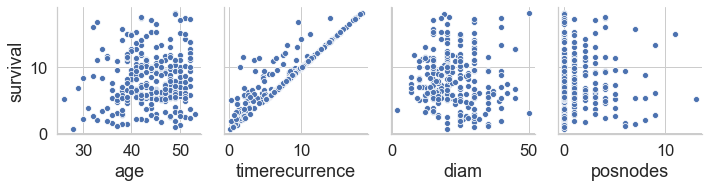

In [19]:
# look for relationships between overall survival time and other continuous variables
sns.pairplot(nki_bc, y_vars=['survival'], x_vars=['age', 'timerecurrence', 'diam', 'posnodes'])

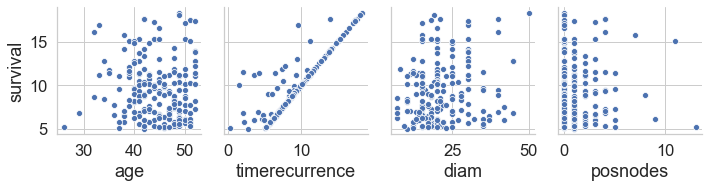

In [20]:
# look for relationships between alive survival time and other continuous variables
sns.pairplot(nki_bc_alive, y_vars=['survival'], x_vars=['age', 'timerecurrence', 'diam', 'posnodes'])

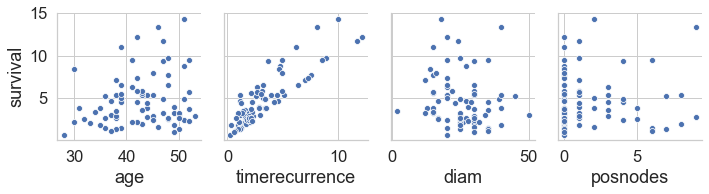

In [21]:
# look for relationships between death survival time and other continuous variables
sns.pairplot(nki_bc_death, y_vars=['survival'], x_vars=['age', 'timerecurrence', 'diam', 'posnodes'])

There does not seem to be any linear relationships between the above variables and survival time. Time to recurrence is not necessarily worth pursuing because the time at which the participant left the study is not known.

### Exploring relationships between variables - categorical variables

The dataset contains both continuous and categorical variables. The categorical variables are examined below

Chemotherapy is defined in the dataset as either yes = 1 or no = 0. The data was divided into those individuals that received chemo (1) and those that did not (0).

In [22]:
#Does chemo treatment affect survival using overall?
chemo_1 = nki_bc['chemo'] == 1
nki_bc2 = nki_bc[chemo_1]
nki_bc2.survival.describe()

count    107.000000
mean       8.065496
std        3.872423
min        1.073238
25%        5.451061
50%        7.093771
75%       10.902122
max       17.659138
Name: survival, dtype: float64

In [23]:
#Does chemo treatment affect survival using overall?
chemo_0 = nki_bc['chemo'] == 0
nki_bc2_0 = nki_bc[chemo_0]
nki_bc2_0.survival.describe()

count    165.000000
mean       8.090410
std        3.937498
min        0.711841
25%        5.555099
50%        7.865845
75%       10.351814
max       18.340862
Name: survival, dtype: float64

In [24]:
#Does chemo treatment affect survival using alive group?
alive_chemo_1 = nki_bc_alive['chemo'] == 1
nki_bc_alive2 = nki_bc_alive[alive_chemo_1]
nki_bc_alive2.survival.describe()

count    81.000000
mean      9.133436
std       3.490287
min       5.037645
25%       6.343600
50%       7.991786
75%      11.195072
max      17.659138
Name: survival, dtype: float64

In [25]:
#Does chemo treatment affect survival using overall?
alive_chemo_0 = nki_bc_alive['chemo'] == 0
nki_bc_alive2_0 = nki_bc_alive[alive_chemo_0]
nki_bc_alive2_0.survival.describe()

count    114.000000
mean       9.596911
std        3.299854
min        5.086927
25%        6.898699
50%        9.100616
75%       11.434634
max       18.340862
Name: survival, dtype: float64

In [26]:
#Does chemo treatment affect survival using death group?
death_chemo_1 = nki_bc_death['chemo'] == 1
nki_bc_death2 = nki_bc_death[death_chemo_1]
nki_bc_death2.survival.describe()

count    26.000000
mean      4.738449
std       3.064579
min       1.073238
25%       2.592527
50%       4.466804
75%       5.670089
max      13.404517
Name: survival, dtype: float64

In [27]:
#Does chemo treatment affect survival using overall?
death_chemo_0 = nki_bc_death['chemo'] == 0
nki_bc_death2_0 = nki_bc_death[death_chemo_0]
nki_bc_death2_0.survival.describe()

count    51.000000
mean      4.722935
std       3.082577
min       0.711841
25%       2.563535
50%       3.737000
75%       6.139630
max      14.360027
Name: survival, dtype: float64

Text(0, 0.5, 'Patient Survival Time (years)')

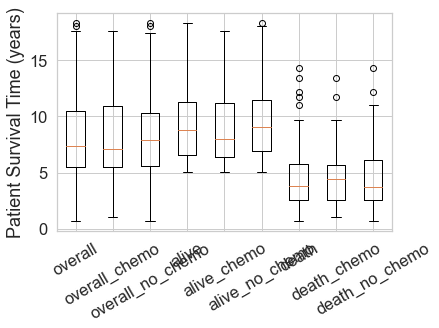

In [28]:
# Visualizing the median, quartiles, and outliers for all idividuals, alive individuals, and death individuals overall and with or without chemo treatment
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc['survival'], nki_bc2['survival'], nki_bc2_0['survival'], nki_bc_alive['survival'], nki_bc_alive2['survival'],  nki_bc_alive2_0['survival'], nki_bc_death['survival'], nki_bc_death2['survival'],  nki_bc_death2_0['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(['overall', 'overall_chemo', 'overall_no_chemo', 'alive', 'alive_chemo', 'alive_no_chemo', 'death', 'death_chemo', 'death_no_chemo'], rotation=30)
ax.set_ylabel('Patient Survival Time (years)')

In [29]:
# Is there a differece bewteen survival time between chemo and no chemo within the 3 groups?
t, p = ttest_ind(nki_bc2['survival'], nki_bc2_0['survival'], equal_var=False)
print("overall_chemo vs overall_no_chemo ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_alive2['survival'], nki_bc_alive2_0['survival'], equal_var=False)
print("alive_chemo vs alive_no_chemo ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_death2['survival'], nki_bc_death2_0['survival'], equal_var=False)
print("death_chemo vs death_no_chemo ttest_ind:            t = %g  p = %g" % (t, p))

overall_chemo vs overall_no_chemo ttest_ind:            t = -0.0514916  p = 0.958979
alive_chemo vs alive_no_chemo ttest_ind:            t = -0.934619  p = 0.351339
death_chemo vs death_no_chemo ttest_ind:            t = 0.0209659  p = 0.983355


#### There does not seem to be a difference between chemo and no chemo within the 3 groups.

In [30]:
#Does hormonal therapy treatment affect survival?
hormonal_1 = nki_bc['hormonal'] == 1
nki_bc3 = nki_bc[hormonal_1]
nki_bc3.survival.describe()

count    36.000000
mean      6.825432
std       2.428790
min       1.316906
25%       5.451745
50%       6.591376
75%       8.308692
max      13.919233
Name: survival, dtype: float64

In [31]:
#Does hormonal therapy treatment affect survival?
hormonal_0 = nki_bc['hormonal'] == 0
nki_bc3_0 = nki_bc[hormonal_0]
nki_bc3_0.survival.describe()

count    236.000000
mean       8.272077
std        4.053044
min        0.711841
25%        5.542349
50%        7.733060
75%       11.056126
max       18.340862
Name: survival, dtype: float64

In [32]:
#Does hormonal therapy affect survival using alive group?
alive_hormonal_1 = nki_bc_alive['hormonal'] == 1
nki_bc_alive3 = nki_bc_alive[alive_hormonal_1]
nki_bc_alive3.survival.describe()

count    30.000000
mean      7.339265
std       2.055770
min       5.259411
25%       5.683778
50%       6.796715
75%       8.498973
max      13.919233
Name: survival, dtype: float64

In [33]:
#Does hormonal therapy affect survival using alive group?
alive_hormonal_0 = nki_bc_alive['hormonal'] == 0
nki_bc_alive3_0 = nki_bc_alive[alive_hormonal_0]
nki_bc_alive3_0.survival.describe()

count    165.000000
mean       9.779868
std        3.440644
min        5.037645
25%        6.874743
50%        9.407255
75%       11.545517
max       18.340862
Name: survival, dtype: float64

In [34]:
#Does hormonal therapy affect survival using death group?
death_hormonal_1 = nki_bc_death['hormonal'] == 1
nki_bc_death3 = nki_bc_death[death_hormonal_1]
nki_bc_death3.survival.describe()

count    6.000000
mean     4.256265
std      2.697469
min      1.316906
25%      2.439983
50%      3.917864
75%      5.228611
max      8.772074
Name: survival, dtype: float64

In [35]:
#Does hormonal therapy affect survival using death group?
death_hormonal_0 = nki_bc_death['hormonal'] == 0
nki_bc_death3_0 = nki_bc_death[death_hormonal_0]
nki_bc_death3_0.survival.describe()

count    71.000000
mean      4.768053
std       3.098568
min       0.711841
25%       2.597784
50%       3.822040
75%       5.819302
max      14.360027
Name: survival, dtype: float64

Text(0, 0.5, 'Patient Survival Time (years)')

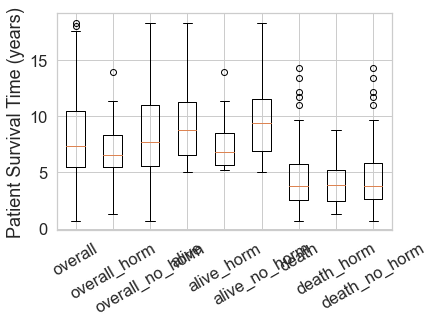

In [36]:
# Visualizing the median, quartiles, and outliers for all idividuals, alive individuals, and death individuals overall and with or without hormone therapy
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc['survival'], nki_bc3['survival'], nki_bc3_0['survival'], nki_bc_alive['survival'], nki_bc_alive3['survival'],  nki_bc_alive3_0['survival'], nki_bc_death['survival'], nki_bc_death3['survival'],  nki_bc_death3_0['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(['overall', 'overall_horm', 'overall_no_horm', 'alive', 'alive_horm', 'alive_no_horm', 'death', 'death_horm', 'death_no_horm'], rotation=30)
ax.set_ylabel('Patient Survival Time (years)')

In [37]:
# Is there a differece bewteen survival time between hormonal therapy and no hormonal therapy within the 3 groups?
t, p = ttest_ind(nki_bc3['survival'], nki_bc3_0['survival'], equal_var=False)
print("overall_horm vs overall_no_horm ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_alive3['survival'], nki_bc_alive3_0['survival'], equal_var=False)
print("alive_horm vs alive_no_horm ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_death3['survival'], nki_bc_death3_0['survival'], equal_var=False)
print("death_horm vs death_no_horm ttest_ind:            t = %g  p = %g" % (t, p))

overall_horm vs overall_no_horm ttest_ind:            t = -2.99397  p = 0.00381698
alive_horm vs alive_no_horm ttest_ind:            t = -5.29293  p = 1.61181e-06
death_horm vs death_no_horm ttest_ind:            t = -0.440812  p = 0.674372


#### There seems to be a difference in survival times between individuals in the alive group that received hormonal therapy and those that did not

In [38]:
#Does mastectomy affect survival?
amp_1 = nki_bc['amputation'] == 1
nki_bc4 = nki_bc[amp_1]
nki_bc4.survival.describe()

count    120.000000
mean       7.958125
std        4.091140
min        1.073238
25%        5.306640
50%        6.747433
75%       10.414100
max       18.340862
Name: survival, dtype: float64

In [39]:
#Does mastectomy affect survival?
amp_0 = nki_bc['amputation'] == 0
nki_bc4_0 = nki_bc[amp_0]
nki_bc4_0.survival.describe()

count    152.000000
mean       8.177307
std        3.762170
min        0.711841
25%        5.675565
50%        7.720739
75%       10.535934
max       17.659138
Name: survival, dtype: float64

In [40]:
#Does mastectomy affect survival using alive group?
alive_mast_1 = nki_bc_alive['amputation'] == 1
nki_bc_alive4 = nki_bc_alive[alive_mast_1]
nki_bc_alive4.survival.describe()

count    82.000000
mean      9.474767
std       3.575256
min       5.037645
25%       6.147844
50%       9.326488
75%      11.357974
max      18.340862
Name: survival, dtype: float64

In [41]:
#Does mastectomy affect survival using alive group?
alive_mast_0 = nki_bc_alive['amputation'] == 0
nki_bc_alive4_0 = nki_bc_alive[alive_mast_0]
nki_bc_alive4_0.survival.describe()

count    113.000000
mean       9.353322
std        3.244669
min        5.114305
25%        6.874743
50%        8.594114
75%       11.156742
max       17.659138
Name: survival, dtype: float64

In [42]:
#Does mastectomy affect survival using death group?
death_mast_1 = nki_bc_death['amputation'] == 1
nki_bc_death4 = nki_bc_death[death_mast_1]
nki_bc_death4.survival.describe()

count    38.000000
mean      4.685373
std       3.122475
min       1.073238
25%       2.611025
50%       3.779520
75%       5.579311
max      14.360027
Name: survival, dtype: float64

In [43]:
#Does mastectomy affect survival using death group?
death_mast_0 = nki_bc_death['amputation'] == 0
nki_bc_death4_0 = nki_bc_death[death_mast_0]
nki_bc_death4_0.survival.describe()

count    39.000000
mean      4.769877
std       3.030666
min       0.711841
25%       2.496920
50%       4.405202
75%       5.819302
max      12.145106
Name: survival, dtype: float64

Text(0, 0.5, 'Patient Survival Time (years)')

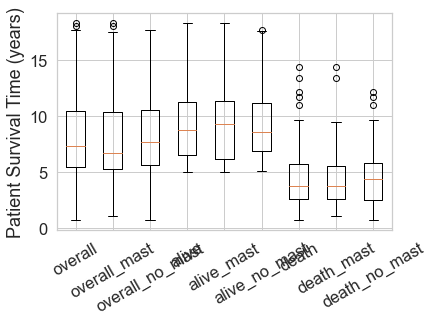

In [44]:
# Visualizing the median, quartiles, and outliers for all idividuals, alive individuals, and death individuals overall and with or without mastectomy
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc['survival'], nki_bc4['survival'], nki_bc4_0['survival'], nki_bc_alive['survival'], nki_bc_alive4['survival'],  nki_bc_alive4_0['survival'], nki_bc_death['survival'], nki_bc_death4['survival'],  nki_bc_death4_0['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(['overall', 'overall_mast', 'overall_no_mast', 'alive', 'alive_mast', 'alive_no_mast', 'death', 'death_mast', 'death_no_mast'], rotation=30)
ax.set_ylabel('Patient Survival Time (years)')

In [45]:
# Is there a differece bewteen survival time between mastectomy and no mastectomy within the 3 groups?
t, p = ttest_ind(nki_bc4['survival'], nki_bc4_0['survival'], equal_var=False)
print("overall_mast vs overall_no_mast ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_alive4['survival'], nki_bc_alive4_0['survival'], equal_var=False)
print("alive_mast vs alive_no_mast ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc_death4['survival'], nki_bc_death4_0['survival'], equal_var=False)
print("death_mast vs death_no_mast ttest_ind:            t = %g  p = %g" % (t, p))

overall_mast vs overall_no_mast ttest_ind:            t = -0.454466  p = 0.649896
alive_mast vs alive_no_mast ttest_ind:            t = 0.243352  p = 0.808036
death_mast vs death_no_mast ttest_ind:            t = -0.120464  p = 0.904439


#### There does not seem to be a difference between mastectomy and no mastectomy within the 3 groups.

In the analysis above, the number of lymph nodes that contained cancerous cells (posnodes) was considered a continuous variable. However, they are placed into groups with intergers as the values. Below, the variation in positive lymph node number will be examined to determine if it could affect survival times in individuals in the alive and death groups.

In [46]:
# What is the range of positive nodes found?
nki_bc['posnodes'].describe()

count    272.000000
mean       1.341912
std        2.108848
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       13.000000
Name: posnodes, dtype: float64

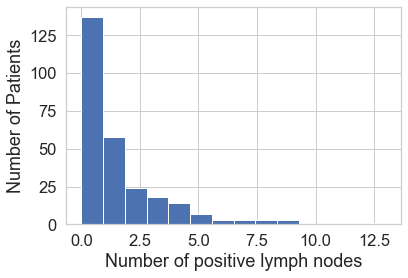

In [47]:
_ = plt.hist(nki_bc.posnodes, bins=14)
_ = plt.xlabel('Number of positive lymph nodes')
_ = plt.ylabel('Number of Patients')

In [48]:
# Does survival time change with the number of positive lymph nodes?
# Separate survival times based on number of positive nodes and determine the 'n' for each

posnodes_0 = nki_bc['posnodes'] == 0
nki_bc5 = nki_bc[posnodes_0]
a=nki_bc5['survival'].count()
print('posnodes_0 n = ', a)

posnodes_1 = nki_bc['posnodes'] == 1
nki_bc6 = nki_bc[posnodes_1]
b=nki_bc6['survival'].count()
print('posnodes_1 n = ', b)

posnodes_2 = nki_bc['posnodes'] == 2
nki_bc7 = nki_bc[posnodes_2]
c=nki_bc7['survival'].count()
print('posnodes_2 n = ', c)

posnodes_3 = nki_bc['posnodes'] == 3
nki_bc8 = nki_bc[posnodes_3]
d=nki_bc8['survival'].count()
print('posnodes_3 n = ', d)

posnodes_4 = nki_bc['posnodes'] == 4
nki_bc9 = nki_bc[posnodes_4]
e=nki_bc9['survival'].count()
print('posnodes_4 n = ', e)

posnodes_5 = nki_bc['posnodes'] == 5
nki_bc10 = nki_bc[posnodes_5]
f=nki_bc10['survival'].count()
print('posnodes_5 n = ', f)

posnodes_6 = nki_bc['posnodes'] == 6
nki_bc11 = nki_bc[posnodes_6]
g=nki_bc11['survival'].count()
print('posnodes_6 n = ', g)

posnodes_7 = nki_bc['posnodes'] == 7
nki_bc12 = nki_bc[posnodes_7]
h=nki_bc12['survival'].count()
print('posnodes_7 n = ', h)

posnodes_8 = nki_bc['posnodes'] == 8
nki_bc13 = nki_bc[posnodes_8]
i=nki_bc13['survival'].count()
print('posnodes_8 n = ', i)

posnodes_9 = nki_bc['posnodes'] == 9
nki_bc14 = nki_bc[posnodes_9]
j=nki_bc14['survival'].count()
print('posnodes_9 n = ', j)

posnodes_11 = nki_bc['posnodes'] == 11
nki_bc15 = nki_bc[posnodes_11]
k=nki_bc15['survival'].count()
print('posnodes_11 n = ', k)

posnodes_13 = nki_bc['posnodes'] == 13
nki_bc16 = nki_bc[posnodes_13]
l=nki_bc16['survival'].count()
print('posnodes_13 n = ', l)

posnodes_5plus = ((nki_bc['posnodes'] >= 5) & (nki_bc['posnodes'] <= 13))
nki_bc17 = nki_bc[posnodes_5plus]
m=nki_bc17['survival'].count()
print('posnodes_5to13 n = ', m)

total = a + b + c + d + e + f + g + h + i + j + k + l
print(total)

posnodes_0 n =  137
posnodes_1 n =  58
posnodes_2 n =  24
posnodes_3 n =  18
posnodes_4 n =  14
posnodes_5 n =  7
posnodes_6 n =  3
posnodes_7 n =  3
posnodes_8 n =  3
posnodes_9 n =  3
posnodes_11 n =  1
posnodes_13 n =  1
posnodes_5to13 n =  21
272


Text(0, 0.5, 'Patient Survival Time (years)')

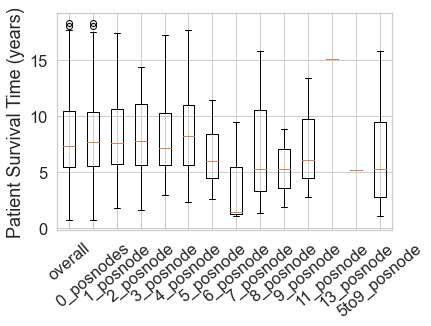

In [49]:
# Visualizing the median, quartiles, and outliers for all idividuals based on number of posnodes
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc['survival'], nki_bc5['survival'], nki_bc6['survival'], nki_bc7['survival'], nki_bc8['survival'], nki_bc9['survival'], nki_bc10['survival'], nki_bc11['survival'], nki_bc12['survival'], nki_bc13['survival'], nki_bc14['survival'], nki_bc15['survival'], nki_bc16['survival'], nki_bc17['survival'] ], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
ax.set_xticklabels(['overall', '0_posnodes', '1_posnode', '2_posnode', '3_posnode', '4_posnode', '5_posnode', '6_posnode', '7_posnode', '8_posnode', '9_posnode', '11_posnode', '13_posnode', '5to9_posnode'], rotation=40)
ax.set_ylabel('Patient Survival Time (years)')

In [50]:
# Is there a difference in survival times between 0 positive nodes and 5-9 positive nodes? 
# Note that 11 and 13 posnodes only had one individual

t, p = ttest_ind(nki_bc5['survival'], nki_bc10['survival'], equal_var=False)
print("0 vs 5 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5['survival'], nki_bc11['survival'], equal_var=False)
print("0 vs 6 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5['survival'], nki_bc12['survival'], equal_var=False)
print("0 vs 7 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5['survival'], nki_bc13['survival'], equal_var=False)
print("0 vs 8 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5['survival'], nki_bc14['survival'], equal_var=False)
print("0 vs 9 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5['survival'], nki_bc17['survival'], equal_var=False)
print("0 vs 5-9 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

0 vs 5 posnodes ttest_ind:            t = 1.23805  p = 0.255332
0 vs 6 posnodes ttest_ind:            t = 1.46328  p = 0.277336
0 vs 7 posnodes ttest_ind:            t = 0.139258  p = 0.901861
0 vs 8 posnodes ttest_ind:            t = 1.34167  p = 0.305294
0 vs 9 posnodes ttest_ind:            t = 0.202701  p = 0.857723
0 vs 5-9 posnodes ttest_ind:            t = 1.40779  p = 0.171411


#### There does not seem to be any differences in survival times based on the number of positive lymph nodes for all individuals in the study

In [51]:
# Separate survival times based on number of positive nodes for alive group and determine the 'n' for each

posnodes_0a = nki_bc_alive['posnodes'] == 0
nki_bc5a = nki_bc_alive[posnodes_0a]
aa=nki_bc5a['survival'].count()
print('posnodes_0_alive n = ', aa)

posnodes_1a = nki_bc_alive['posnodes'] == 1
nki_bc6a = nki_bc_alive[posnodes_1a]
ba=nki_bc6a['survival'].count()
print('posnodes_1_alive n = ', ba)

posnodes_2a = nki_bc_alive['posnodes'] == 2
nki_bc7a = nki_bc_alive[posnodes_2a]
ca=nki_bc7a['survival'].count()
print('posnodes_2_alive n = ', ca)

posnodes_3a = nki_bc_alive['posnodes'] == 3
nki_bc8a = nki_bc_alive[posnodes_3a]
da=nki_bc8a['survival'].count()
print('posnodes_3_alive n = ', da)

posnodes_4a = nki_bc_alive['posnodes'] == 4
nki_bc9a = nki_bc_alive[posnodes_4a]
ea=nki_bc9a['survival'].count()
print('posnodes_4_alive n = ', ea)

posnodes_5a = nki_bc_alive['posnodes'] == 5
nki_bc10a = nki_bc_alive[posnodes_5a]
fa=nki_bc10a['survival'].count()
print('posnodes_5_alive n = ', fa)

posnodes_6a = nki_bc_alive['posnodes'] == 6
nki_bc11a = nki_bc_alive[posnodes_6a]
ga=nki_bc11a['survival'].count()
print('posnodes_6_alive n = ', ga)

posnodes_7a = nki_bc_alive['posnodes'] == 7
nki_bc12a = nki_bc_alive[posnodes_7a]
ha=nki_bc12a['survival'].count()
print('posnodes_7_alive n = ', ha)

posnodes_8a = nki_bc_alive['posnodes'] == 8
nki_bc13a = nki_bc_alive[posnodes_8a]
ia=nki_bc13a['survival'].count()
print('posnodes_8_alive n = ', ia)

posnodes_9a = nki_bc_alive['posnodes'] == 9
nki_bc14a = nki_bc_alive[posnodes_9a]
ja=nki_bc14a['survival'].count()
print('posnodes_9_alive n = ', ja)

posnodes_11a = nki_bc_alive['posnodes'] == 11
nki_bc15a = nki_bc_alive[posnodes_11a]
ka=nki_bc15a['survival'].count()
print('posnodes_11_alive n = ', ka)

posnodes_13a = nki_bc_alive['posnodes'] == 13
nki_bc16a = nki_bc_alive[posnodes_13a]
la=nki_bc16a['survival'].count()
print('posnodes_13_alive n = ', la)

posnodes_5plusa = ((nki_bc_alive['posnodes'] >= 5) & (nki_bc_alive['posnodes'] <= 13))
nki_bc17a = nki_bc_alive[posnodes_5plusa]
ma=nki_bc17a['survival'].count()
print('posnodes_5to13_alive n = ', ma)

total = aa + ba + ca + da + ea + fa + ga + ha + ia + ja + ka + la
print(total)

posnodes_0_alive n =  96
posnodes_1_alive n =  46
posnodes_2_alive n =  20
posnodes_3_alive n =  13
posnodes_4_alive n =  10
posnodes_5_alive n =  5
posnodes_6_alive n =  0
posnodes_7_alive n =  1
posnodes_8_alive n =  1
posnodes_9_alive n =  1
posnodes_11_alive n =  1
posnodes_13_alive n =  1
posnodes_5to13_alive n =  10
195


Text(0, 0.5, 'Patient Survival Time (years)')

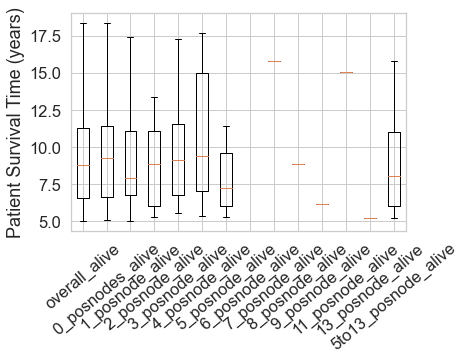

In [52]:
# Visualizing the median, quartiles, and outliers for alive individuals based on number of posnodes
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc_alive['survival'], nki_bc5a['survival'], nki_bc6a['survival'], nki_bc7a['survival'], nki_bc8a['survival'], nki_bc9a['survival'], nki_bc10a['survival'], nki_bc11a['survival'], nki_bc12a['survival'], nki_bc13a['survival'], nki_bc14a['survival'], nki_bc15a['survival'], nki_bc16a['survival'], nki_bc17a['survival'] ], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
ax.set_xticklabels(['overall_alive', '0_posnodes_alive', '1_posnode_alive', '2_posnode_alive', '3_posnode_alive', '4_posnode_alive', '5_posnode_alive', '6_posnode_alive', '7_posnode_alive', '8_posnode_alive', '9_posnode_alive', '11_posnode_alive', '13_posnode_alive', '5to13_posnode_alive'], rotation=40)
ax.set_ylabel('Patient Survival Time (years)')

In [53]:
# Is there a difference in survival times in alive group between 0 positive nodes and 5-13 positive nodes?
# Note that there are 0 or 1 individuals for 6-13 positive nodes

t, p = ttest_ind(nki_bc5a['survival'], nki_bc10a['survival'], equal_var=False)
print("0 vs 5 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5a['survival'], nki_bc17a['survival'], equal_var=False)
print("0 vs 5-13 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

0 vs 5 posnodes ttest_ind:            t = 1.44686  p = 0.210306
0 vs 5-13 posnodes ttest_ind:            t = 0.452864  p = 0.659884


#### There does not seem to be any differences in survival times within the alive group based on number of positive lymph nodes

In [54]:
# Separate survival times based on number of positive nodes for death group and determine the 'n' for each

posnodes_0d = nki_bc_death['posnodes'] == 0
nki_bc5d = nki_bc_death[posnodes_0d]
ad=nki_bc5d['survival'].count()
print('posnodes_0_death n = ', ad)

posnodes_1d = nki_bc_death['posnodes'] == 1
nki_bc6d = nki_bc_death[posnodes_1d]
bd=nki_bc6d['survival'].count()
print('posnodes_1_death n = ', bd)

posnodes_2d = nki_bc_death['posnodes'] == 2
nki_bc7d = nki_bc_death[posnodes_2d]
cd=nki_bc7d['survival'].count()
print('posnodes_2_death n = ', cd)

posnodes_3d = nki_bc_death['posnodes'] == 3
nki_bc8d = nki_bc_death[posnodes_3d]
dd=nki_bc8d['survival'].count()
print('posnodes_3_death n = ', dd)

posnodes_4d = nki_bc_death['posnodes'] == 4
nki_bc9d = nki_bc_death[posnodes_4d]
ed=nki_bc9d['survival'].count()
print('posnodes_4_death n = ', ed)

posnodes_5d = nki_bc_death['posnodes'] == 5
nki_bc10d = nki_bc_death[posnodes_5d]
fd=nki_bc10d['survival'].count()
print('posnodes_5_death n = ', fd)

posnodes_6d = nki_bc_death['posnodes'] == 6
nki_bc11d = nki_bc_death[posnodes_6d]
gd=nki_bc11d['survival'].count()
print('posnodes_6_death n = ', gd)

posnodes_7d = nki_bc_death['posnodes'] == 7
nki_bc12d = nki_bc_death[posnodes_7d]
hd=nki_bc12d['survival'].count()
print('posnodes_7_death n = ', hd)

posnodes_8d = nki_bc_death['posnodes'] == 8
nki_bc13d = nki_bc_death[posnodes_8d]
id=nki_bc13d['survival'].count()
print('posnodes_8_death n = ', id)

posnodes_9d = nki_bc_death['posnodes'] == 9
nki_bc14d = nki_bc_death[posnodes_9d]
jd=nki_bc14d['survival'].count()
print('posnodes_9_death n = ', jd)

posnodes_11d = nki_bc_death['posnodes'] == 11
nki_bc15d = nki_bc_death[posnodes_11d]
kd=nki_bc15d['survival'].count()
print('posnodes_11_death n = ', kd)

posnodes_13d = nki_bc_death['posnodes'] == 13
nki_bc16d = nki_bc_death[posnodes_13d]
ld=nki_bc16d['survival'].count()
print('posnodes_13_death n = ', ld)

posnodes_5plusd = ((nki_bc_death['posnodes'] >= 5) & (nki_bc_death['posnodes'] <= 13))
nki_bc17d = nki_bc_death[posnodes_5plusd]
md=nki_bc17d['survival'].count()
print('posnodes_5to13_death n = ', md)

total = ad + bd + cd + dd + ed + fd + gd + hd + id + jd + kd + ld
print(total)

posnodes_0_death n =  41
posnodes_1_death n =  12
posnodes_2_death n =  4
posnodes_3_death n =  5
posnodes_4_death n =  4
posnodes_5_death n =  2
posnodes_6_death n =  3
posnodes_7_death n =  2
posnodes_8_death n =  2
posnodes_9_death n =  2
posnodes_11_death n =  0
posnodes_13_death n =  0
posnodes_5to13_death n =  11
77


Text(0, 0.5, 'Patient Survival Time (years)')

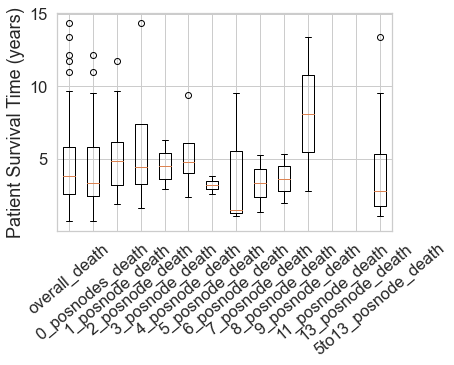

In [55]:
# Visualizing the median, quartiles, and outliers for death idividuals based on number of posnodes
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc_death['survival'], nki_bc5d['survival'], nki_bc6d['survival'], nki_bc7d['survival'], nki_bc8d['survival'], nki_bc9d['survival'], nki_bc10d['survival'], nki_bc11d['survival'], nki_bc12d['survival'], nki_bc13d['survival'], nki_bc14d['survival'], nki_bc15d['survival'], nki_bc16d['survival'], nki_bc17d['survival'] ], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
ax.set_xticklabels(['overall_death', '0_posnodes_death', '1_posnode_death', '2_posnode_death', '3_posnode_death', '4_posnode_death', '5_posnode_death', '6_posnode_death', '7_posnode_death', '8_posnode_death', '9_posnode_death', '11_posnode_death', '13_posnode_death', '5to13_posnode_death'], rotation=40)
ax.set_ylabel('Patient Survival Time (years)')

In [56]:
# Is there a difference in survival times between 0 positive nodes and 5-13 positive nodes?
# Note that there are no individuals with 11 or 13 positive nodes

t, p = ttest_ind(nki_bc5d['survival'], nki_bc10d['survival'], equal_var=False)
print("0 vs 5 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5d['survival'], nki_bc11d['survival'], equal_var=False)
print("0 vs 6 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5d['survival'], nki_bc12d['survival'], equal_var=False)
print("0 vs 7 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5d['survival'], nki_bc13d['survival'], equal_var=False)
print("0 vs 8 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5d['survival'], nki_bc14d['survival'], equal_var=False)
print("0 vs 9 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc5d['survival'], nki_bc17d['survival'], equal_var=False)
print("0 vs 5-13 posnodes ttest_ind:            t = %g  p = %g" % (t, p))

0 vs 5 posnodes ttest_ind:            t = 1.68944  p = 0.214268
0 vs 6 posnodes ttest_ind:            t = 0.146734  p = 0.89621
0 vs 7 posnodes ttest_ind:            t = 0.555433  p = 0.670166
0 vs 8 posnodes ttest_ind:            t = 0.461367  p = 0.717091
0 vs 9 posnodes ttest_ind:            t = -0.689501  p = 0.614434
0 vs 5-13 posnodes ttest_ind:            t = 0.0182258  p = 0.985736


#### There seem to be no differences in survival times within the death group based on the number of positive lymph nodes

While there seem to be no differences between the survival times based on the number of positive lymph nodes within the 3 groups, is there a consistent difference in survival time between the alive and death groups based on the number of positive lymph nodes? For example, does survival time decrease in individuals with 1 positive lymph node in the death group compared to the alive group?

Text(0, 0.5, 'Patient Survival Time (years)')

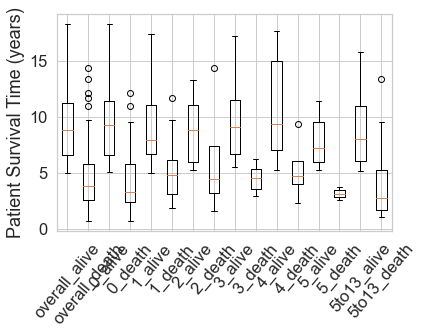

In [57]:
# Comparing survival times between alive and death groups based on number of positive nodes
fig, ax = plt.subplots(1, 1)
ax.boxplot([nki_bc_alive['survival'], nki_bc_death['survival'], nki_bc5a['survival'], nki_bc5d['survival'], nki_bc6a['survival'], nki_bc6d['survival'], nki_bc7a['survival'], nki_bc7d['survival'], nki_bc8a['survival'], nki_bc8d['survival'], nki_bc9a['survival'], nki_bc9d['survival'], nki_bc10a['survival'], nki_bc10d['survival'], nki_bc17a['survival'], nki_bc17d['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
ax.set_xticklabels(['overall_alive', 'overall_death', '0_alive', '0_death', '1_alive', '1_death', '2_alive', '2_death', '3_alive', '3_death','4_alive', '4_death', '5_alive', '5_death', '5to13_alive', '5to13_death'], rotation=50)
ax.set_ylabel('Patient Survival Time (years)')


In [58]:
# Is there a difference in survival times between 0 positive nodes and 5-13 positive nodes?

t, p = ttest_ind(nki_bc5a['survival'], nki_bc5d['survival'], equal_var=False)
print("0 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc6a['survival'], nki_bc6d['survival'], equal_var=False)
print("1 posnode alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc7a['survival'], nki_bc7d['survival'], equal_var=False)
print("2 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc8a['survival'], nki_bc8d['survival'], equal_var=False)
print("3 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc9a['survival'], nki_bc9d['survival'], equal_var=False)
print("4 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc10a['survival'], nki_bc10d['survival'], equal_var=False)
print("5 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc17a['survival'], nki_bc17d['survival'], equal_var=False)
print("5-13 posnodes alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

0 posnodes alive vs death ttest_ind:            t = 9.2922  p = 7.66613e-15
1 posnode alive vs death ttest_ind:            t = 3.68713  p = 0.00172595
2 posnodes alive vs death ttest_ind:            t = 0.822679  p = 0.466382
3 posnodes alive vs death ttest_ind:            t = 4.35073  p = 0.000495792
4 posnodes alive vs death ttest_ind:            t = 2.6212  p = 0.027605
5 posnodes alive vs death ttest_ind:            t = 3.64965  p = 0.0147827
5-13 posnodes alive vs death ttest_ind:            t = 2.72921  p = 0.0134224


#### There seems to be at least a slight difference in survival times between the alive and death groups for each class of positive lymph nodes (which was expected based on differences in overall survival times), except for those with 2 positive lymph nodes. 

Pathological grade is determined by the cell's differentiation and growth rate. The grades are divided into 3 categories: 1 = low (slow growth rate and little differentiation), 2 = intermediate, and 3 = high (fast growth rate and significant differentiation). Below, the analyses will examine whether survival times are altered based on pathological grade. 

In [59]:
# Does survival time in all individuals change with the pathological grade?
# Separate survival times based pathological grade category and determine the 'n' for each

grade_low = nki_bc['grade'] == 1
nki_bc18 = nki_bc[grade_low]
a2=nki_bc18['survival'].count()
print('grade_low n = ', a2)

grade_med = nki_bc['grade'] == 2
nki_bc19 = nki_bc[grade_med]
b2=nki_bc19['survival'].count()
print('grade_med n = ', b2)

grade_high = nki_bc['grade'] == 3
nki_bc20 = nki_bc[grade_high]
c2=nki_bc20['survival'].count()
print('grade_high n = ', c2)

total = a2 + b2 + c2
print(total)

grade_low n =  71
grade_med n =  95
grade_high n =  106
272


Text(0, 0.5, 'Patient Survival Time (years)')

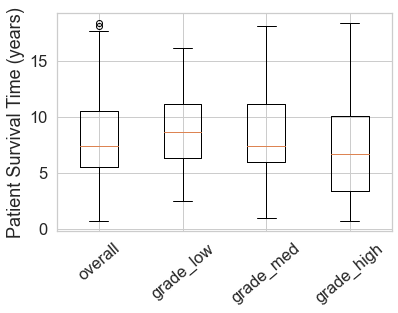

In [60]:
# Comparing survival times between in all individuals based on pathological grade
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc['survival'], nki_bc18['survival'], nki_bc19['survival'], nki_bc20['survival']], positions=[1, 2, 3, 4, ])
ax2.set_xticklabels(['overall', 'grade_low', 'grade_med', 'grade_high'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [61]:
# Is there a difference in survival times between low and medium or high pathological grades?

t, p = ttest_ind(nki_bc18['survival'], nki_bc19['survival'], equal_var=False)
print("low vs med ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc18['survival'], nki_bc20['survival'], equal_var=False)
print("low vs high posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc19['survival'], nki_bc20['survival'], equal_var=False)
print("med vs high posnodes ttest_ind:            t = %g  p = %g" % (t, p))

low vs med ttest_ind:            t = 0.669192  p = 0.504318
low vs high posnodes ttest_ind:            t = 2.93885  p = 0.00373996
med vs high posnodes ttest_ind:            t = 2.21308  p = 0.0280287


#### There seems to be a difference in survival times between low and high grades and possibly between intermediate and high grades.

In [62]:
# Does survival time change with the pathological grade for alive group?
# Separate survival times based pathological grade category and determine the 'n' for each

grade_low_alive = nki_bc_alive['grade'] == 1
nki_bc18a = nki_bc_alive[grade_low_alive]
a2a=nki_bc18a['survival'].count()
print('grade_low_alive n = ', a2a)

grade_med_alive = nki_bc_alive['grade'] == 2
nki_bc19a = nki_bc_alive[grade_med_alive]
b2a=nki_bc19a['survival'].count()
print('grade_med_alive n = ', b2a)

grade_high_alive = nki_bc_alive['grade'] == 3
nki_bc20a = nki_bc_alive[grade_high_alive]
c2a=nki_bc20a['survival'].count()
print('grade_high_alive n = ', c2a)

total = a2a + b2a + c2a
print(total)

grade_low_alive n =  67
grade_med_alive n =  71
grade_high_alive n =  57
195


Text(0, 0.5, 'Patient Survival Time (years)')

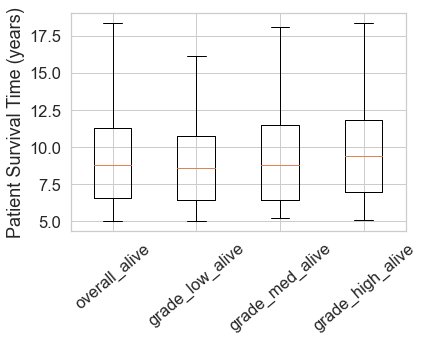

In [63]:
# Comparing survival times between in alive individuals based on pathological grade
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc_alive['survival'], nki_bc18a['survival'], nki_bc19a['survival'], nki_bc20a['survival']], positions=[1, 2, 3, 4, ])
ax2.set_xticklabels(['overall_alive', 'grade_low_alive', 'grade_med_alive', 'grade_high_alive'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [64]:
# Is there a difference in survival times between low and medium or high pathological grades?

t, p = ttest_ind(nki_bc18a['survival'], nki_bc19a['survival'], equal_var=False)
print("low vs med ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc18a['survival'], nki_bc20a['survival'], equal_var=False)
print("low vs high posnodes ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc19a['survival'], nki_bc20a['survival'], equal_var=False)
print("med vs high posnodes ttest_ind:            t = %g  p = %g" % (t, p))

low vs med ttest_ind:            t = -1.18589  p = 0.237785
low vs high posnodes ttest_ind:            t = -1.93515  p = 0.0556098
med vs high posnodes ttest_ind:            t = -0.765467  p = 0.445494


#### There does not seem to be a difference in survival times based on pathological grades for alive individuals. If there is a difference, it may be between the low and high grades.

In [65]:
# Does survival time change with the pathological grade for death group?
# Separate survival times based pathological grade category and determine the 'n' for each

grade_low_death = nki_bc_death['grade'] == 1
nki_bc18d = nki_bc_death[grade_low_death]
a2d=nki_bc18d['survival'].count()
print('grade_low_death n = ', a2d)

grade_med_death = nki_bc_death['grade'] == 2
nki_bc19d = nki_bc_death[grade_med_death]
b2d=nki_bc19d['survival'].count()
print('grade_med_death n = ', b2d)

grade_high_death = nki_bc_death['grade'] == 3
nki_bc20d = nki_bc_death[grade_high_death]
c2d=nki_bc20d['survival'].count()
print('grade_high_death n = ', c2d)

total = a2d + b2d + c2d
print(total)

grade_low_death n =  4
grade_med_death n =  24
grade_high_death n =  49
77


Text(0, 0.5, 'Patient Survival Time (years)')

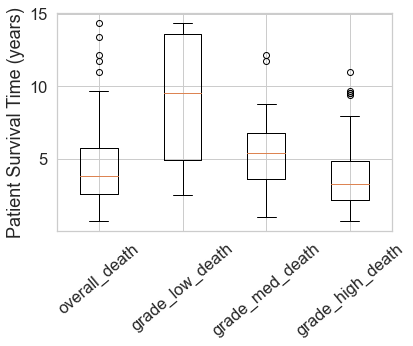

In [66]:
# Comparing survival times between in death individuals based on pathological grade
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc_death['survival'], nki_bc18d['survival'], nki_bc19d['survival'], nki_bc20d['survival']], positions=[1, 2, 3, 4, ])
ax2.set_xticklabels(['overall_death', 'grade_low_death', 'grade_med_death', 'grade_high_death'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [67]:
# Is there a difference in survival times between low and medium or high pathological grades?

t, p = ttest_ind(nki_bc18d['survival'], nki_bc19d['survival'], equal_var=False)
print("low vs med ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc18d['survival'], nki_bc20d['survival'], equal_var=False)
print("low vs high ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc19d['survival'], nki_bc20d['survival'], equal_var=False)
print("med vs high ttest_ind:            t = %g  p = %g" % (t, p))

low vs med ttest_ind:            t = 1.18089  p = 0.316834
low vs high ttest_ind:            t = 1.7165  p = 0.181801
med vs high ttest_ind:            t = 2.21531  p = 0.0323541


#### There does not seem to be a difference in survival times based on pathological grades for alive individuals. If there is a difference, it may be between the low and high grades. Is this due to the outliers?

Text(0, 0.5, 'Patient Survival Time (years)')

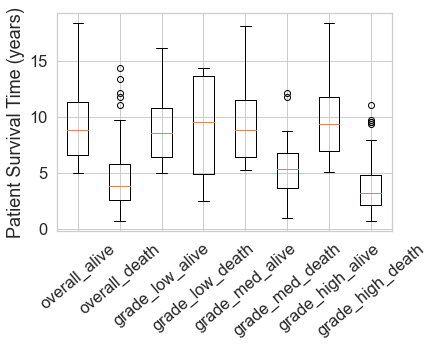

In [68]:
# Comparing survival times between in alive and death individuals based on pathological grade
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc_alive['survival'], nki_bc_death['survival'], nki_bc18a['survival'], nki_bc18d['survival'], nki_bc19a['survival'], nki_bc19d['survival'], nki_bc20a['survival'], nki_bc20d['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8])
ax2.set_xticklabels(['overall_alive', 'overall_death', 'grade_low_alive', 'grade_low_death', 'grade_med_alive', 'grade_med_death', 'grade_high_alive', 'grade_high_death'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [69]:
# Is there a difference in survival times between low and medium or high pathological grades?

t, p = ttest_ind(nki_bc18a['survival'], nki_bc18d['survival'], equal_var=False)
print("low alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc19a['survival'], nki_bc19d['survival'], equal_var=False)
print("med alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc20a['survival'], nki_bc20d['survival'], equal_var=False)
print("high alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

low alive vs death ttest_ind:            t = -0.0602825  p = 0.95562
med alive vs death ttest_ind:            t = 5.48795  p = 1.39502e-06
high alive vs death ttest_ind:            t = 10.0287  p = 8.33453e-17


#### There seems to be a difference between alive and death groups for the intermediate and high grades, but not for the low grade.

In [70]:
# Does survival time change with degree of vascular invasion?
# Separate survival times based vascular invasion category and determine the 'n' for each

absent = nki_bc['angioinv'] == 1
nki_bc21 = nki_bc[absent]
a3=nki_bc21['survival'].count()
print('absent n = ', a3)

minor = nki_bc['angioinv'] == 2
nki_bc22 = nki_bc[minor]
b3=nki_bc22['survival'].count()
print('minor n = ', b3)

major = nki_bc['angioinv'] == 3
nki_bc23 = nki_bc[major]
c3=nki_bc23['survival'].count()
print('major n = ', c3)

total = a3 + b3 + c3
print(total)

absent n =  169
minor n =  30
major n =  73
272


Text(0, 0.5, 'Patient Survival Time (years)')

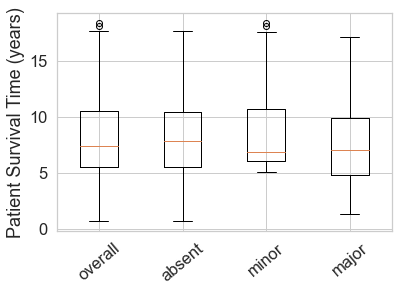

In [71]:
# Comparing survival times between in all individuals based on vascular invasion
fig3, ax3 = plt.subplots(1, 1)
ax3.boxplot([nki_bc['survival'], nki_bc21['survival'], nki_bc22['survival'], nki_bc23['survival']], positions=[1, 2, 3, 4, ])
ax3.set_xticklabels(['overall', 'absent', 'minor', 'major'], rotation=40)
ax3.set_ylabel('Patient Survival Time (years)')

In [72]:
# Is there a difference in survival times between absent, minor, and major vascular invasion?

t, p = ttest_ind(nki_bc21['survival'], nki_bc22['survival'], equal_var=False)
print("absent vs minor ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc21['survival'], nki_bc23['survival'], equal_var=False)
print("absent vs major ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc22['survival'], nki_bc23['survival'], equal_var=False)
print("minor vs major ttest_ind:            t = %g  p = %g" % (t, p))

absent vs minor ttest_ind:            t = -0.848137  p = 0.401674
absent vs major ttest_ind:            t = 1.26698  p = 0.207325
minor vs major ttest_ind:            t = 1.54868  p = 0.127776


#### There appears to be no difference is survival times for all individuals with any degree of vascular invasion.

In [73]:
# Does survival time change with degree of vascular invasion for alive group?
# Separate survival times based vascular invasion category and determine the 'n' for each

absent_alive = nki_bc_alive['angioinv'] == 1
nki_bc21a = nki_bc_alive[absent_alive]
a3a=nki_bc21a['survival'].count()
print('absent_alive n = ', a3a)

minor_alive = nki_bc_alive['angioinv'] == 2
nki_bc22a = nki_bc_alive[minor_alive]
b3a=nki_bc22a['survival'].count()
print('minor_alive n = ', b3a)

major_alive = nki_bc_alive['angioinv'] == 3
nki_bc23a = nki_bc_alive[major_alive]
c3a=nki_bc23a['survival'].count()
print('major_alive n = ', c3a)

total = a3a + b3a + c3a
print(total)

absent_alive n =  128
minor_alive n =  25
major_alive n =  42
195


Text(0, 0.5, 'Patient Survival Time (years)')

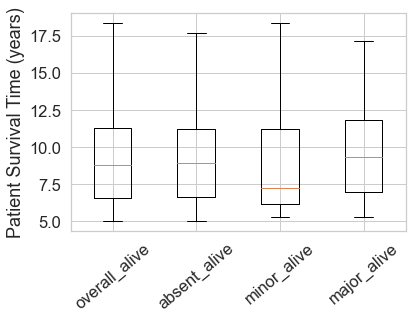

In [74]:
# Comparing survival times between in alive individuals based on vascular invasion
fig3, ax3 = plt.subplots(1, 1)
ax3.boxplot([nki_bc_alive['survival'], nki_bc21a['survival'], nki_bc22a['survival'], nki_bc23a['survival']], positions=[1, 2, 3, 4, ])
ax3.set_xticklabels(['overall_alive', 'absent_alive', 'minor_alive', 'major_alive'], rotation=40)
ax3.set_ylabel('Patient Survival Time (years)')

In [75]:
# Is there a difference in survival times between absent, minor, and major vascular invasion?

t, p = ttest_ind(nki_bc21a['survival'], nki_bc22a['survival'], equal_var=False)
print("absent vs minor ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc21a['survival'], nki_bc23a['survival'], equal_var=False)
print("absent vs major ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc22a['survival'], nki_bc23a['survival'], equal_var=False)
print("minor vs major ttest_ind:            t = %g  p = %g" % (t, p))

absent vs minor ttest_ind:            t = 0.112975  p = 0.910815
absent vs major ttest_ind:            t = -0.640564  p = 0.523845
minor vs major ttest_ind:            t = -0.468242  p = 0.642201


#### There doesn't seeem to be any differences in survival times in alive individuals based on level of vascular invasion.

In [76]:
# Does survival time change with degree of vascular invasion for death group?
# Separate survival times based vascular invasion category and determine the 'n' for each

absent_death = nki_bc_death['angioinv'] == 1
nki_bc21d = nki_bc_death[absent_death]
a3d=nki_bc21d['survival'].count()
print('absent_death n = ', a3d)

minor_death = nki_bc_death['angioinv'] == 2
nki_bc22d = nki_bc_death[minor_death]
b3d=nki_bc22d['survival'].count()
print('minor_death n = ', b3d)

major_death = nki_bc_death['angioinv'] == 3
nki_bc23d = nki_bc_death[major_death]
c3d=nki_bc23d['survival'].count()
print('major_death n = ', c3d)

total = a3d + b3d + c3d
print(total)

absent_death n =  41
minor_death n =  5
major_death n =  31
77


Text(0, 0.5, 'Patient Survival Time (years)')

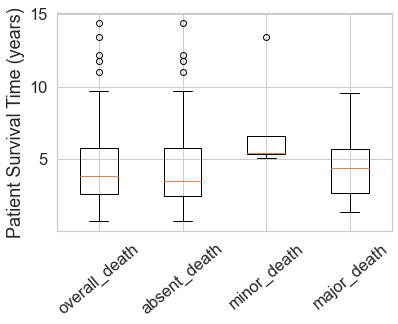

In [77]:
# Comparing survival times between in death individuals based on vascular invasion
fig3, ax3 = plt.subplots(1, 1)
ax3.boxplot([nki_bc_death['survival'], nki_bc21d['survival'], nki_bc22d['survival'], nki_bc23d['survival']], positions=[1, 2, 3, 4, ])
ax3.set_xticklabels(['overall_death', 'absent_death', 'minor_death', 'major_death'], rotation=40)
ax3.set_ylabel('Patient Survival Time (years)')

In [78]:
# Is there a difference in survival times between absent, minor, and major vascular invasion?

t, p = ttest_ind(nki_bc21d['survival'], nki_bc22d['survival'], equal_var=False)
print("absent vs minor ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc21d['survival'], nki_bc23d['survival'], equal_var=False)
print("absent vs major ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc22d['survival'], nki_bc23d['survival'], equal_var=False)
print("minor vs major ttest_ind:            t = %g  p = %g" % (t, p))

absent vs minor ttest_ind:            t = -1.53941  p = 0.185548
absent vs major ttest_ind:            t = 0.0999641  p = 0.920659
minor vs major ttest_ind:            t = 1.59977  p = 0.174689


#### There doesn't seeem to be any differences in survival times in death individuals based on level of vascular invasion.

Text(0, 0.5, 'Patient Survival Time (years)')

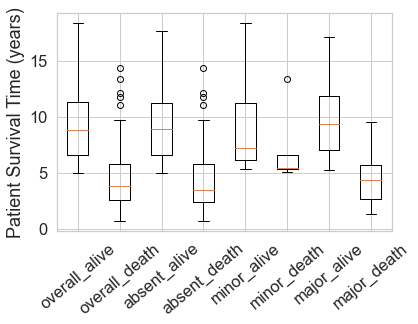

In [79]:
# Comparing survival times between in alive and death individuals based on vascular invasion
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc_alive['survival'], nki_bc_death['survival'], nki_bc21a['survival'], nki_bc21d['survival'], nki_bc22a['survival'], nki_bc22d['survival'], nki_bc23a['survival'], nki_bc23d['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8])
ax2.set_xticklabels(['overall_alive', 'overall_death', 'absent_alive', 'absent_death', 'minor_alive', 'minor_death', 'major_alive', 'major_death'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [80]:
# Is there a difference in survival times between absent and minor or major vascular invasion for alive and death groups?

t, p = ttest_ind(nki_bc21a['survival'], nki_bc21d['survival'], equal_var=False)
print("absent alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc22a['survival'], nki_bc22d['survival'], equal_var=False)
print("minor alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc23a['survival'], nki_bc23d['survival'], equal_var=False)
print("major alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

absent alive vs death ttest_ind:            t = 8.01344  p = 2.37567e-11
minor alive vs death ttest_ind:            t = 1.15261  p = 0.288745
major alive vs death ttest_ind:            t = 7.81249  p = 3.84599e-11


#### There seeems to be differences in survival times in between alive and death individuals in the absent and major groups based on level of vascular invasion but not the minor group. Is this due to a low n or outliers?

In [81]:
# Does survival time change with degree of lymphocytic infiltration?
# Separate survival times based lymphocytic infiltration category and determine the 'n' for each

lymph_1 = nki_bc['lymphinfil'] == 1
nki_bc24 = nki_bc[lymph_1]
a4=nki_bc24['survival'].count()
print('lymph_1 n = ', a4)

lymph_2 = nki_bc['lymphinfil'] == 2
nki_bc25 = nki_bc[lymph_2]
b4=nki_bc25['survival'].count()
print('lymph_2 n = ', b4)

lymph_3 = nki_bc['lymphinfil'] == 3
nki_bc26 = nki_bc[lymph_3]
c4=nki_bc26['survival'].count()
print('lymph_3 n = ', c4)

total = a4 + b4 + c4
print(total)

lymph_1 n =  223
lymph_2 n =  27
lymph_3 n =  22
272


Text(0, 0.5, 'Patient Survival Time (years)')

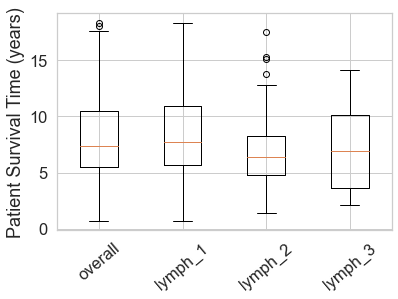

In [82]:
# Comparing survival times between in all individuals based on lymphocytic infiltration
fig4, ax4 = plt.subplots(1, 1)
ax4.boxplot([nki_bc['survival'], nki_bc24['survival'], nki_bc25['survival'], nki_bc26['survival']], positions=[1, 2, 3, 4, ])
ax4.set_xticklabels(['overall', 'lymph_1', 'lymph_2', 'lymph_3'], rotation=40)
ax4.set_ylabel('Patient Survival Time (years)')

In [83]:
# Is there a difference in survival times between levels of lymphocytic infiltration?

t, p = ttest_ind(nki_bc24['survival'], nki_bc25['survival'], equal_var=False)
print("lymph_1 vs lymph_2 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc24['survival'], nki_bc26['survival'], equal_var=False)
print("lymph_1 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc25['survival'], nki_bc26['survival'], equal_var=False)
print("lymph_2 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

lymph_1 vs lymph_2 ttest_ind:            t = 1.39575  p = 0.172703
lymph_1 vs lymph_3 ttest_ind:            t = 1.42011  p = 0.16761
lymph_2 vs lymph_3 ttest_ind:            t = -0.0460446  p = 0.96347


#### There doesn't seem to be any differences in survival times in all individuals based on levels of lymphocytic infiltration.

In [84]:
# Does survival time change with degree of lymphocytic infiltration for alive group?
# Separate survival times based lymphocytic infiltration category and determine the 'n' for each

lymph_1_alive = nki_bc_alive['lymphinfil'] == 1
nki_bc24a = nki_bc_alive[lymph_1_alive]
a4a=nki_bc24a['survival'].count()
print('lymph_1_alive n = ', a4a)

lymph_2_alive = nki_bc_alive['lymphinfil'] == 2
nki_bc25a = nki_bc_alive[lymph_2_alive]
b4a=nki_bc25a['survival'].count()
print('lymph_2_alive n = ', b4a)

lymph_3_alive = nki_bc_alive['lymphinfil'] == 3
nki_bc26a = nki_bc_alive[lymph_3_alive]
c4a=nki_bc26a['survival'].count()
print('lymph_3_alive n = ', c4a)

total = a4a + b4a + c4a
print(total)

lymph_1_alive n =  164
lymph_2_alive n =  17
lymph_3_alive n =  14
195


Text(0, 0.5, 'Patient Survival Time (years)')

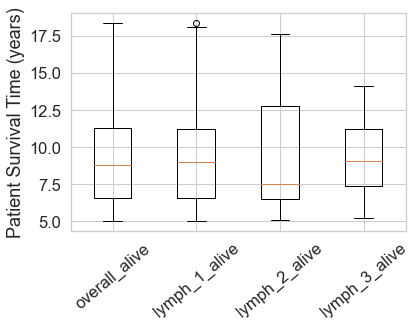

In [85]:
# Comparing survival times between in alive individuals based on lymphocytic infiltration
fig4, ax4 = plt.subplots(1, 1)
ax4.boxplot([nki_bc_alive['survival'], nki_bc24a['survival'], nki_bc25a['survival'], nki_bc26a['survival']], positions=[1, 2, 3, 4, ])
ax4.set_xticklabels(['overall_alive', 'lymph_1_alive', 'lymph_2_alive', 'lymph_3_alive'], rotation=40)
ax4.set_ylabel('Patient Survival Time (years)')

In [86]:
# Is there a difference in survival times between levels of lymphocytic infiltration?

t, p = ttest_ind(nki_bc24a['survival'], nki_bc25a['survival'], equal_var=False)
print("lymph_1 vs lymph_2 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc24a['survival'], nki_bc26a['survival'], equal_var=False)
print("lymph_1 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc25a['survival'], nki_bc26a['survival'], equal_var=False)
print("lymph_2 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

lymph_1 vs lymph_2 ttest_ind:            t = 0.136241  p = 0.893103
lymph_1 vs lymph_3 ttest_ind:            t = 0.141146  p = 0.889428
lymph_2 vs lymph_3 ttest_ind:            t = -0.0244128  p = 0.980697


#### There doesn't seem to be any differences in survival times in alive individuals based on levels of lymphocytic infiltration.

In [87]:
# Does survival time change with degree of lymphocytic infiltration for death group?
# Separate survival times based lymphocytic infiltration category and determine the 'n' for each

lymph_1_death = nki_bc_death['lymphinfil'] == 1
nki_bc24d = nki_bc_death[lymph_1_death]
a4d=nki_bc24d['survival'].count()
print('lymph_1_death n = ', a4d)

lymph_2_death = nki_bc_death['lymphinfil'] == 2
nki_bc25d = nki_bc_death[lymph_2_death]
b4d=nki_bc25d['survival'].count()
print('lymph_2_death n = ', b4d)

lymph_3_death = nki_bc_death['lymphinfil'] == 3
nki_bc26d = nki_bc_death[lymph_3_death]
c4d=nki_bc26d['survival'].count()
print('lymph_3_death n = ', c4d)

total = a4d + b4d + c4d
print(total)

lymph_1_death n =  59
lymph_2_death n =  10
lymph_3_death n =  8
77


Text(0, 0.5, 'Patient Survival Time (years)')

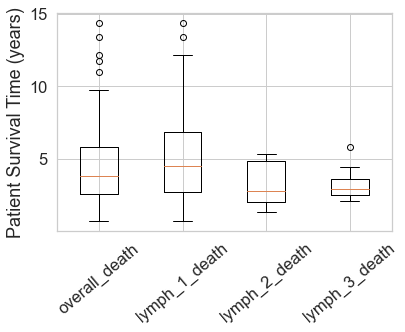

In [88]:
# Comparing survival times between in alive individuals based on lymphocytic infiltration
fig4, ax4 = plt.subplots(1, 1)
ax4.boxplot([nki_bc_death['survival'], nki_bc24d['survival'], nki_bc25d['survival'], nki_bc26d['survival']], positions=[1, 2, 3, 4, ])
ax4.set_xticklabels(['overall_death', 'lymph_1_death', 'lymph_2_death', 'lymph_3_death'], rotation=40)
ax4.set_ylabel('Patient Survival Time (years)')

In [89]:
# Is there a difference in survival times between levels of lymphocytic infiltration?

t, p = ttest_ind(nki_bc24d['survival'], nki_bc25d['survival'], equal_var=False)
print("lymph_1 vs lymph_2 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc24d['survival'], nki_bc26d['survival'], equal_var=False)
print("lymph_1 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc25d['survival'], nki_bc26d['survival'], equal_var=False)
print("lymph_2 vs lymph_3 ttest_ind:            t = %g  p = %g" % (t, p))

lymph_1 vs lymph_2 ttest_ind:            t = 2.84133  p = 0.00892061
lymph_1 vs lymph_3 ttest_ind:            t = 3.08918  p = 0.00505743
lymph_2 vs lymph_3 ttest_ind:            t = 0.0232869  p = 0.981709


#### There seems to be a difference in survival times in death individuals between levels 1 and 2 as well as 1 and 3, but not 2 and 3.

Text(0, 0.5, 'Patient Survival Time (years)')

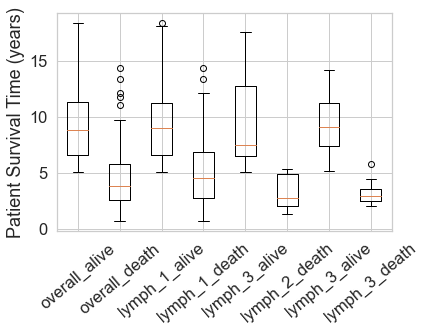

In [90]:
# Comparing survival times between in alive and death individuals based on lymphocytuc infiltration
fig2, ax2 = plt.subplots(1, 1)
ax2.boxplot([nki_bc_alive['survival'], nki_bc_death['survival'], nki_bc24a['survival'], nki_bc24d['survival'], nki_bc25a['survival'], nki_bc25d['survival'], nki_bc26a['survival'], nki_bc26d['survival']], positions=[1, 2, 3, 4, 5, 6, 7, 8])
ax2.set_xticklabels(['overall_alive', 'overall_death', 'lymph_1_alive', 'lymph_1_death', 'lymph_3_alive', 'lymph_2_death', 'lymph_3_alive', 'lymph_3_death'], rotation=40)
ax2.set_ylabel('Patient Survival Time (years)')

In [91]:
# Is there a difference in survival times between level of lymphocytic infiltration for alive and death groups?

t, p = ttest_ind(nki_bc24a['survival'], nki_bc24d['survival'], equal_var=False)
print("lymph_1 alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc25a['survival'], nki_bc25d['survival'], equal_var=False)
print("lymph_2 alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nki_bc26a['survival'], nki_bc26d['survival'], equal_var=False)
print("lymph_3 alive vs death ttest_ind:            t = %g  p = %g" % (t, p))

lymph_1 alive vs death ttest_ind:            t = 8.45518  p = 1.70329e-13
lymph_2 alive vs death ttest_ind:            t = 5.5175  p = 1.31063e-05
lymph_3 alive vs death ttest_ind:            t = 7.23734  p = 6.0033e-07


#### All levels of lymphocytic infiltration display a decrease in survival times in alive and death groups.

## Gene expression analyses

### Dividing survival times into groups

Below, the individuals are divided into 3 year bins based on survival time and placed into a new column ("survival_group"). These groups can be used to look at potential differences in gene expression among those individuals with lower survival times and those with higher.

In [92]:
# Add column to df for survival bins
nki_bc.insert(loc=3, column='survival_group', value=['' for i in range(nki_bc.shape[0])])

In [93]:
# Check to see if new column is present
nki_bc.head()

,age,eventdeath,survival,survival_group,timerecurrence,chemo,hormonal,amputation,histtype,diam,...,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,eventdeath2
0,43,0,14.817248,,14.817248,0,0,1,1,25,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,Survived
1,48,0,14.261465,,14.261465,0,0,0,1,20,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,Survived
2,38,0,6.644764,,6.644764,0,0,0,1,15,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,Survived
3,50,0,7.748118,,7.748118,0,1,0,1,15,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,Survived
4,38,0,6.436687,,6.318960,0,0,1,1,15,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,Survived


In [94]:
# Create groups based on survival time
nki_bc.loc[((nki_bc.survival >= 0) & (nki_bc.survival <=3)), 'survival_group'] = '1'
nki_bc.loc[((nki_bc.survival > 3) & (nki_bc.survival <=6)), 'survival_group'] = '2'
nki_bc.loc[((nki_bc.survival > 6) & (nki_bc.survival <=9)), 'survival_group'] = '3'
nki_bc.loc[((nki_bc.survival > 9) & (nki_bc.survival <=12)), 'survival_group'] = '4'
nki_bc.loc[((nki_bc.survival > 12) & (nki_bc.survival <=15)), 'survival_group'] = '5'
nki_bc.loc[((nki_bc.survival > 15) & (nki_bc.survival <=19)), 'survival_group'] = '6'

In [95]:
nki_bc.head()

,age,eventdeath,survival,survival_group,timerecurrence,chemo,hormonal,amputation,histtype,diam,...,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,eventdeath2
0,43,0,14.817248,5,14.817248,0,0,1,1,25,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,Survived
1,48,0,14.261465,5,14.261465,0,0,0,1,20,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,Survived
2,38,0,6.644764,3,6.644764,0,0,0,1,15,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,Survived
3,50,0,7.748118,3,7.748118,0,1,0,1,15,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,Survived
4,38,0,6.436687,3,6.318960,0,0,1,1,15,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,Survived


In [96]:
# How many individuals are in each survival group
# Check to see if total = 272
n = (nki_bc.survival_group == '1').sum()
print("group 1 =", n)
o = (nki_bc.survival_group == '2').sum()
print("group 2 =", m)
p = (nki_bc.survival_group == '3').sum()
print("group 3 =", p)
q = (nki_bc.survival_group == '4').sum()
print("group 4 =", q)
r = (nki_bc.survival_group == '5').sum()
print("group 5 =", r)
s = (nki_bc.survival_group == '6').sum()
print("group 6 =", s)

print(n + o + p + q + r + s)

group 1 = 29
group 2 = 21
group 3 = 81
group 4 = 63
group 5 = 21
group 6 = 19
272


In [97]:
# Separate new df based on eventdeath = alive
alive_new = nki_bc['eventdeath'] == 0
nki_bc_alive_new = nki_bc[alive_new]
event_a=nki_bc_alive_new['survival'].count()
print('alive at end of study n = ', event_a)

alive at end of study n =  195


In [98]:
# Separate new df based on eventdeath = death
death_new = nki_bc['eventdeath'] == 1
nki_bc_death_new = nki_bc[death_new]
event_d=nki_bc_death_new['survival'].count()
print('death at end of study n = ', event_d)

death at end of study n =  77


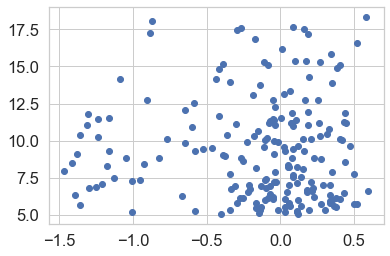

In [99]:
# Check to see how survival time changes based on expression levels of one gene (esr1)
plt.scatter(nki_bc_alive_new['esr1'], nki_bc_alive_new['survival'])

In [100]:
# Is there a relationship between esr1 and survival time?
nki_bc_alive_new['esr1'].corr(nki_bc_alive_new['survival'])

-0.003931789708053483

In [101]:
# Separate survival into new df
nki_bc_survival = nki_bc['survival'].to_frame()

In [102]:
# Create a function that will list all genes and there corresponding correlation coefficients when compared with survival
# Note, no correlations seemed to be above 0.3, so are listing any correlations over 0.2
def surv_corr(df1, df2):
    for col1 in df1:
        for col in df2:
            x = df1[col1].corr(df2[col])
            if abs(x) >= 0.2:
                print(col1, 'corr = ', x)

In [103]:
# Create a df with only genes and corresponding values for each individual
nki_bc_genes = nki_bc.drop(['age', 'eventdeath', 'survival', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [104]:
nki_bc_genes.head()

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,...,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,eventdeath2
0,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,Survived
1,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,Survived
2,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,Survived
3,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,Survived
4,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,Survived


In [105]:
# Determine genes that display a correlation greater than 0.2 between each gene and survival
surv_corr(nki_bc_genes, nki_bc_survival)

esr1 corr =  0.24142486022692602
U45975 corr =  0.20733204762044433
NM_002358 corr =  -0.24458872075088525
NM_001635 corr =  0.2094315495696976
NM_000909 corr =  0.22089983581879882
Contig47045_RC corr =  0.21840378738771457
NM_003258 corr =  -0.23715723707987504
NM_001809 corr =  -0.2711488142919696
Contig53357_RC corr =  0.20475923063822837
Contig53307_RC corr =  0.2348080229894828
Contig56434_RC corr =  0.20493941767370283
NM_005080 corr =  0.21894244930777237
NM_004358 corr =  -0.203219758472083
NM_004456 corr =  -0.20745250168742838
NM_005196 corr =  -0.24592887610899064
NM_004496 corr =  0.21197359465825072
NM_006006 corr =  0.21552116080439687
NM_013324 corr =  0.2041176449650137
NM_005342 corr =  -0.2013351610056506
NM_005375 corr =  0.23317855066013515
NM_003981 corr =  -0.23790147958825422
NM_006113 corr =  0.20510346355563375
Contig53968_RC corr =  0.20166643605978365
NM_004701 corr =  -0.23156431256325366
NM_004702 corr =  -0.23146244218861353
Contig66705_RC corr =  -0.2201

TypeError: unsupported operand type(s) for /: 'str' and 'int'

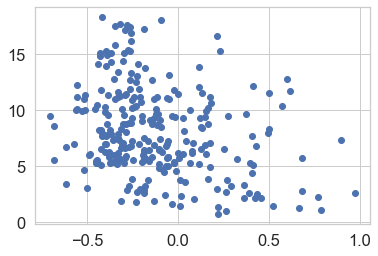

In [106]:
# Visualize one of these genes (NM_00133 corr = -0.2798)
plt.scatter(nki_bc_genes['NM_001333'], nki_bc_survival['survival'])

In [107]:
# Create df for genes of alive individuals
nki_bc_alive_genes = nki_bc_alive.drop(['age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [108]:
nki_bc_alive_genes.head()

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [109]:
# Create df for genes of death individuals
nki_bc_death_genes = nki_bc_death.drop(['age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [110]:
nki_bc_death_genes.head()

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
9,-1.324176,-0.104224,-0.427800,-0.003295,-0.060694,-0.253229,-0.165621,-1.110337,-0.726393,-0.392540,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580
12,-0.162349,0.190224,0.157729,-0.110239,-0.022853,0.061682,0.468902,-0.226406,-0.237759,-0.599157,...,0.115984,-0.364999,0.055677,-0.631157,0.231151,-0.058433,0.080366,-0.285472,-0.238604,0.370100
14,-0.661729,0.096640,-0.258875,-0.105883,-0.178748,0.368888,-0.255147,-0.518845,-0.928234,-0.821369,...,0.486894,-0.307986,-0.019385,-0.074633,-0.262925,-0.032161,-0.337821,0.257535,0.385928,-0.755791
16,-0.435775,-0.799154,0.081538,-0.013132,0.034742,-0.504213,-0.048261,-0.272853,-0.514442,0.007723,...,0.340210,0.209754,0.011824,-0.087450,-0.167448,-0.015781,0.234903,-0.003074,-0.404941,-0.182364
19,-1.255379,-0.006519,-0.201504,-0.120400,-0.077757,1.050243,0.018297,-0.534194,-0.737589,0.125992,...,0.148252,0.026755,0.143584,-0.766902,-0.022762,-0.019199,0.121523,0.162393,-0.893341,0.334673


In [111]:
# Separate survival into new df for alive individuals
nki_bc_survival_alive = nki_bc_alive['survival'].to_frame()

In [112]:
# Determine genes that display a correlation greater than 0.2 between each gene and survival for alive individuals
surv_corr(nki_bc_alive_genes, nki_bc_survival_alive)

Contig32037_RC corr =  0.20738261303022654
NM_002509 corr =  0.2524594997638878
Contig38826_RC corr =  0.21508280388257003
NM_004345 corr =  0.2312870571390089
NM_004482 corr =  -0.22625537101569088
NM_004792 corr =  -0.2207555038719731
Contig56307 corr =  -0.20558154825130914
NM_004986 corr =  -0.21434249333605027
AL050202 corr =  0.22689024527097626
AF067420 corr =  0.20762736549626604


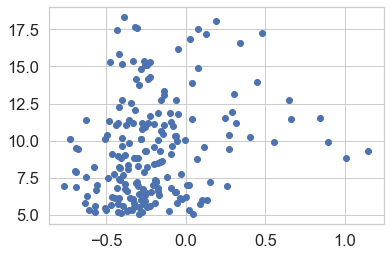

In [113]:
# Visualize one of these genes (NM_004345 corr = 0.2312)
plt.scatter(nki_bc_alive_genes['NM_004345'], nki_bc_survival_alive['survival'])

In [114]:
# Separate survival into new df for death individuals
nki_bc_survival_death = nki_bc_death['survival'].to_frame()

In [115]:
# Determine genes that display a correlation greater than 0.2 between each gene and survival for death individuals
surv_corr(nki_bc_death_genes, nki_bc_survival_death)

esr1 corr =  0.30796128164550884
Contig56678_RC corr =  0.22688472827324846
AL157500 corr =  -0.27337390809345385
AL157502 corr =  0.2798262088578259
Contig37376_RC corr =  -0.21648365420816065
Contig7192 corr =  -0.22671720818537067
Contig13929_RC corr =  -0.2356747260574162
NM_001609 corr =  0.2295222240442853
NM_002343 corr =  0.3550562027209625
NM_000909 corr =  0.24620294752054556
Contig35896_RC corr =  0.23140299068003586
NM_000926 corr =  0.225390128611191
X99142 corr =  -0.23752245965619553
NM_001710 corr =  0.20823843727243285
Contig18502_RC corr =  0.27414420753991975
Contig37562_RC corr =  0.307479474418625
Contig50288_RC corr =  -0.2655015809580612
Contig8165_RC corr =  -0.25390823840174637
NM_003225 corr =  0.21448616321065994
NM_001809 corr =  -0.23424104564093925
NM_002570 corr =  0.20189274848276528
L11645 corr =  0.23864086989680786
NM_001853 corr =  -0.22344004494367367
Contig31333_RC corr =  -0.25833330643063573
Contig41530_RC corr =  0.2804835253645881
Contig38826_R

NM_001185 corr =  0.3566910824881178
Contig57825_RC corr =  0.2052376111923658
Contig55883_RC corr =  0.36752079878904503
Contig42402_RC corr =  0.23175730047010104
NM_001218 corr =  0.22177181881261962
NM_000507 corr =  0.20388450778161912
L10333 corr =  0.2580173645370045
NM_001267 corr =  0.21337440573076163
NM_017954 corr =  0.2500141438754404
Contig15190_RC corr =  0.225872955505561
AF111849 corr =  0.21761916645431642
NM_002001 corr =  0.20329791438843237
NM_001333 corr =  -0.20896313844133316
NM_000624 corr =  0.24447717818877399
NM_002089 corr =  0.20887264144017056
Contig33235_RC corr =  0.21473091283916587
NM_000633 corr =  0.32643764751052906
NM_000662 corr =  0.2033665443022698
Contig50950_RC corr =  -0.28576149544801804
Contig34303_RC corr =  0.2865199697455137
NM_002160 corr =  -0.21469377082870467
Contig57584_RC corr =  -0.21043128885581036
Contig58301_RC corr =  0.24611809675378168
NM_000824 corr =  0.25257123846988466
AF067420 corr =  0.205821784522454


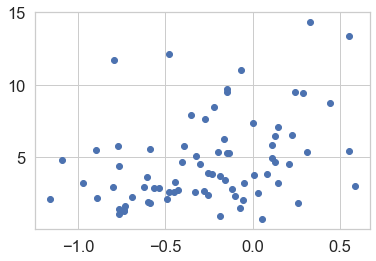

In [116]:
# Visualize one of these genes (NM_001185 corr = 0.3566)
plt.scatter(nki_bc_death_genes['NM_001185'], nki_bc_survival_death['survival'])

Based on the above analyses, it appears as if there are particular genes that may exhibit a slight relationship between their expression levels and survival time. When divided into the alive and death groups, there are more genes that have a correlation greater than |0.2| in the death group than in the alive group, and some of the genes in the alive and death groups are the same.

#### Are there correlations between gene expression levels in the alive and death groups?

Samples of only 25 will be used

In [117]:
sample = nki_bc_survival.sample(n=25)

In [118]:
alive_sample = nki_bc_alive_genes.sample(n=25)

In [119]:
death_sample = nki_bc_alive_genes.sample(n=25)

In [120]:
alive_sample['esr1'].corr(death_sample['esr1'])

0.9999999999999999

In [121]:
alive_sample['G3PDH_570'].corr(death_sample['G3PDH_570'])

1.0

In [122]:
def gene_corr(df1, df2):
    for col in df1:
        for col in df2:
            x = df1[col].corr(df2[col])
            if abs(x) <= 0.9:
                print(col, 'corr = ', x)

In [123]:
gene_corr(alive_sample, death_sample)

KeyboardInterrupt: 

There seem to be 0 genes in the dataset that have a correlation of 0.9 or less between the alive and death groups. 

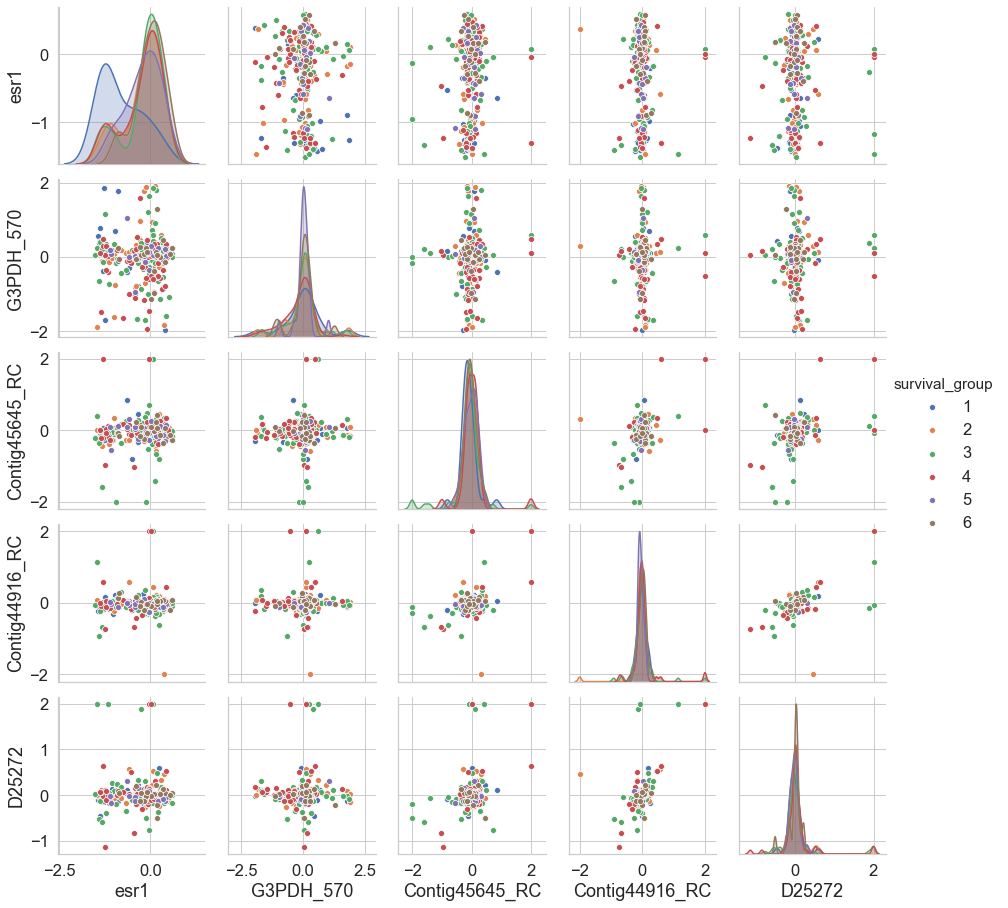

In [124]:
# Are there differences in gene expression based on survival time? Using 3 year bins for survival groups
# Visualize the relationship between the expression levels of 5 genes in overall individuals
sns.pairplot(nki_bc, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"],  hue = "survival_group")

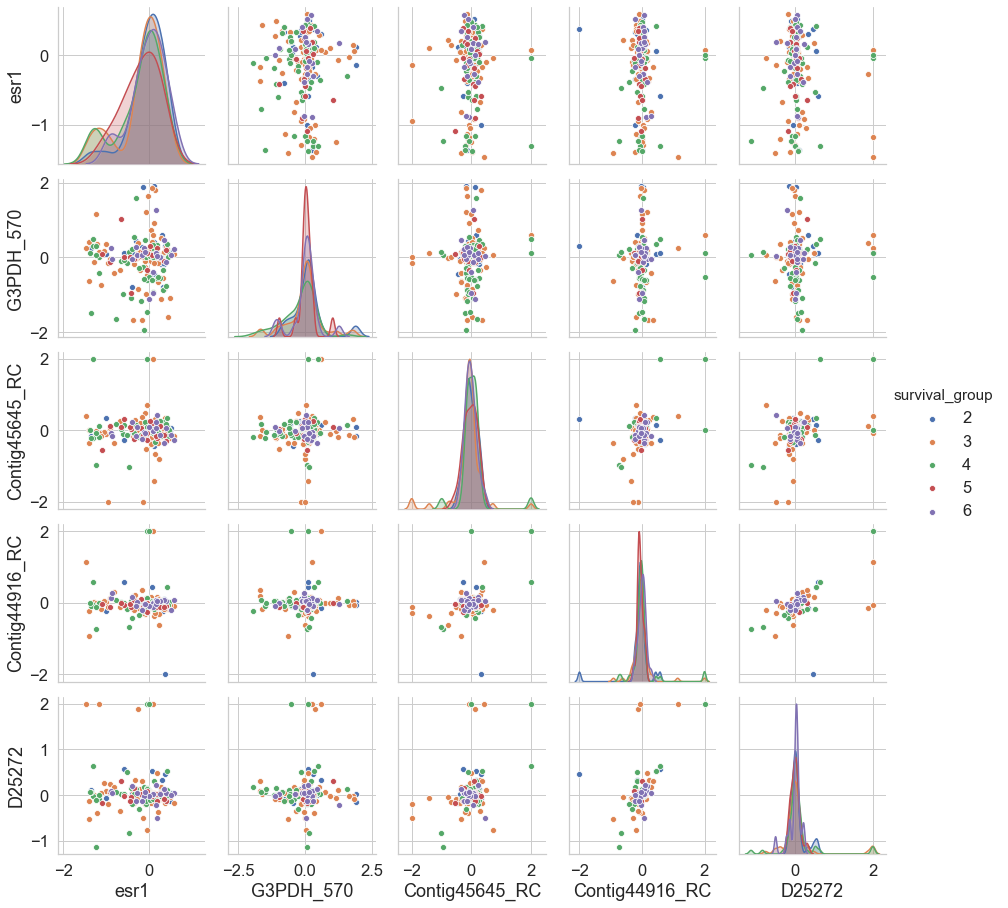

In [125]:
# Visualize the relationship between the expression levels of 5 genes in alive individuals
sns.pairplot(nki_bc_alive_new, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"], hue = "survival_group")

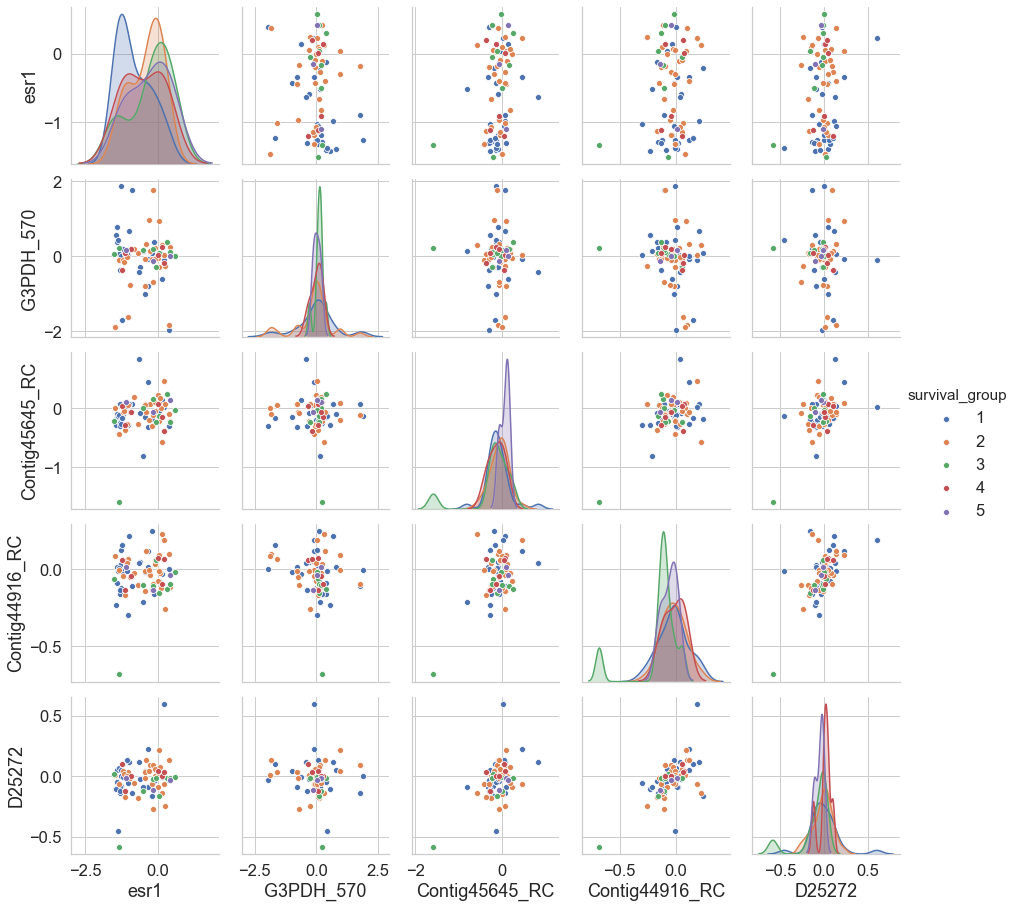

In [126]:
# Visualize the relationship between the expression levels of 5 genes in death individuals
sns.pairplot(nki_bc_death_new, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"], hue = "survival_group")

In [127]:
surv_group_1 = nki_bc['survival_group'] == '1'
nki_bc27 = nki_bc[surv_group_1]
a5=nki_bc27['survival'].count()
print('surviv_group_1 n = ', a5)

surviv_group_1 n =  29


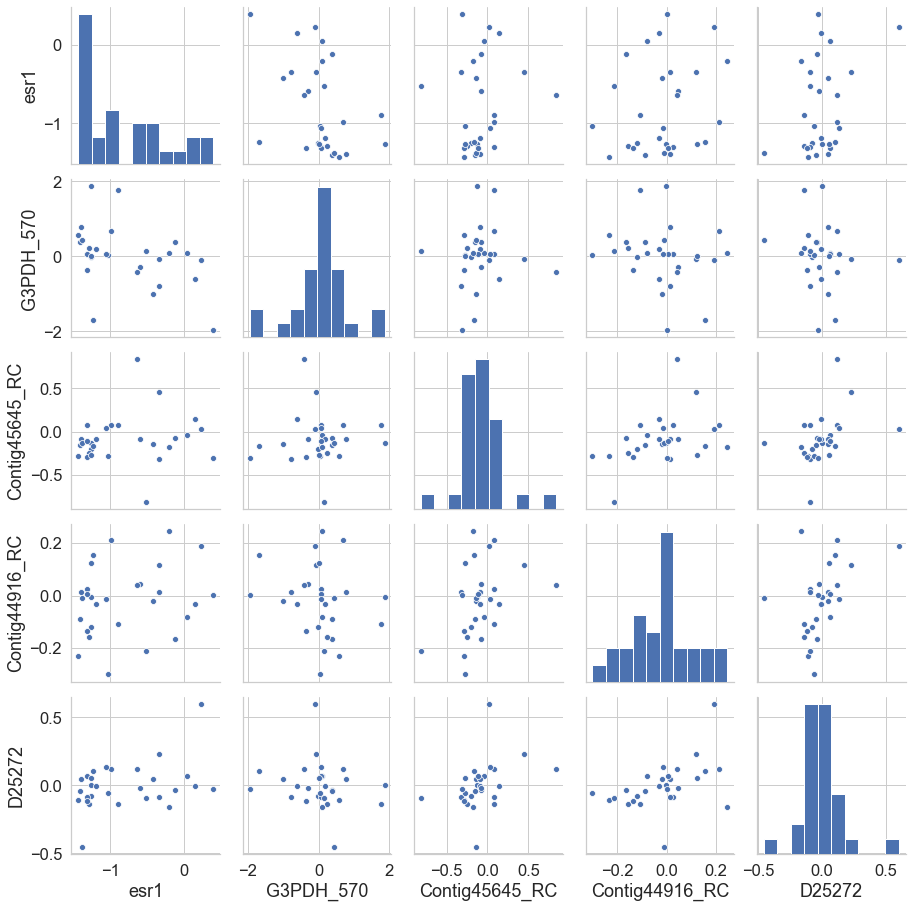

In [128]:
#Plot survival groups separately using all individuals
sns.pairplot(nki_bc27, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"])

In [129]:
surv_group_2 = nki_bc['survival_group'] == '2'
nki_bc28 = nki_bc[surv_group_2]
b5=nki_bc28['survival'].count()
print('surviv_group_1 n = ', b5)

surviv_group_1 n =  59


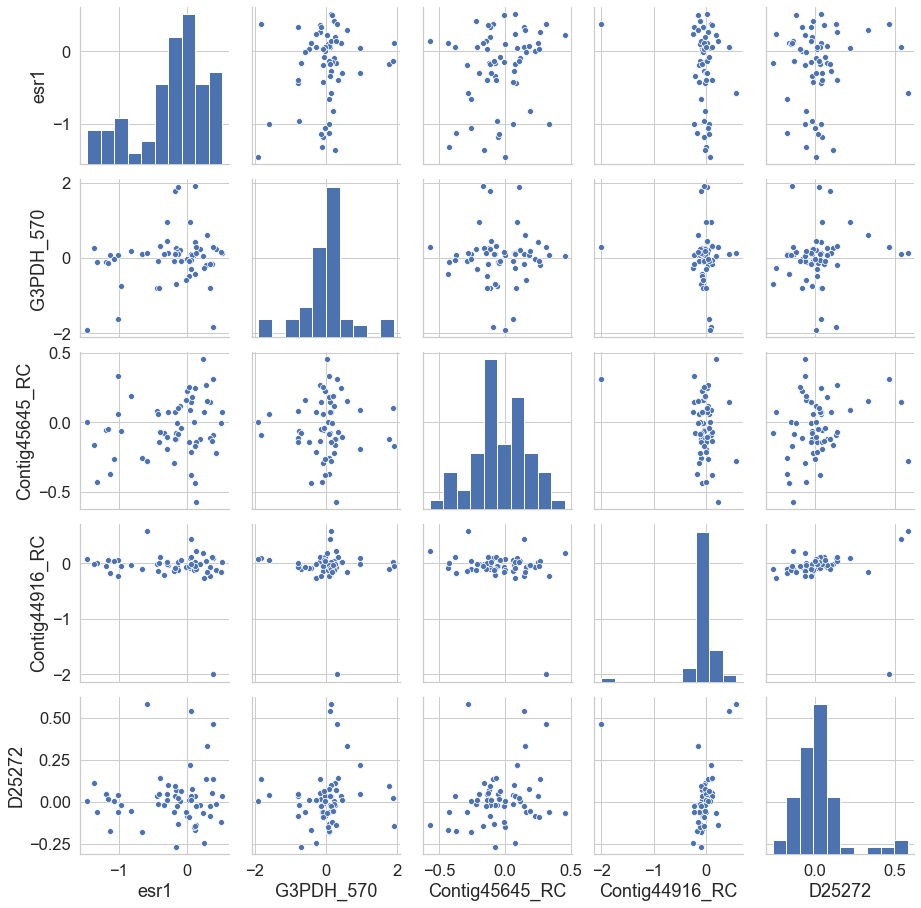

In [130]:
sns.pairplot(nki_bc28, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"])

In [131]:
# Does the correlation between 2 genes vary based on survival group?
nki_bc27['esr1'].corr(nki_bc27['G3PDH_570'])

-0.4145364757348577

In [132]:
nki_bc28['esr1'].corr(nki_bc28['G3PDH_570'])

0.20031555658095093

The correlations shift from negative to positve between 0-3 years survival and 3-6 years survival in overall individuals

In [133]:
# Is this change maintain in other survival groups?
surv_group_3 = nki_bc['survival_group'] == '3'
nki_bc29 = nki_bc[surv_group_3]
c5=nki_bc29['survival'].count()
print('surviv_group_3 n = ', c5)

surviv_group_3 n =  81


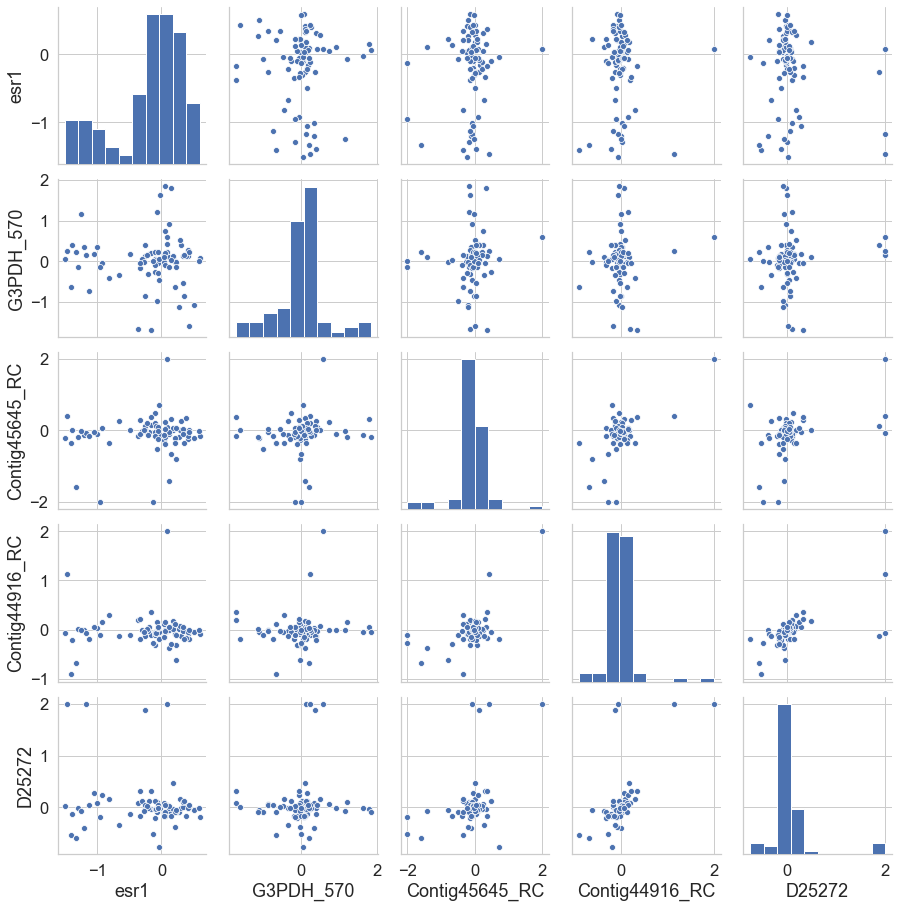

In [134]:
sns.pairplot(nki_bc29, vars=["esr1", "G3PDH_570", "Contig45645_RC", "Contig44916_RC", "D25272"])

In [135]:
nki_bc29['esr1'].corr(nki_bc29['G3PDH_570'])

-0.029727019665869894

It is not maintained for these 2 genes, as it switches back to negative

In [136]:
# Is this change observed with other genes?
nki_bc27['D25272'].corr(nki_bc27['Contig44916_RC'])

0.43985540814809615

In [137]:
nki_bc28['D25272'].corr(nki_bc28['Contig44916_RC'])

-0.029022331160783888

In [138]:
nki_bc29['D25272'].corr(nki_bc29['Contig44916_RC'])

0.6517844220026883

In [139]:
# Create df for genes of all individuals in survival group 1
nki_bc27_genes = nki_bc27.drop(['age', 'eventdeath', 'survival', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [140]:
# Create df for genes of all individuals in survival group 2
nki_bc28_genes = nki_bc28.drop(['age', 'eventdeath', 'survival', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [141]:
# Create df for genes of all individuals in survival group 3
nki_bc29_genes = nki_bc29.drop(['age', 'eventdeath', 'survival', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [142]:
surv_group_6 = nki_bc['survival_group'] == '6'
nki_bc30 = nki_bc[surv_group_6]
b6=nki_bc30['survival'].count()
print('surviv_group_6 n = ', b6)

surviv_group_6 n =  19


In [143]:
# Create df for genes of all individuals in survival group 6
nki_bc30_genes = nki_bc30.drop(['age', 'eventdeath', 'survival', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

#### Are there any differences in survival between the alive and death groups based on gene expression

The slope of the regression lines will be compared between the 2 groups to examine whether there are shifts between the 2 groups.

In [144]:
alive = nki_bc['eventdeath'] == 0
nki_bc_alive = nki_bc[alive]
event_a=nki_bc_alive['survival'].count()
print('alive at end of study n = ', event_a)

alive at end of study n =  195


In [145]:
death = nki_bc['eventdeath'] == 1
nki_bc_death = nki_bc[death]
event_d=nki_bc_death['survival'].count()
print('death at end of study n = ', event_d)

death at end of study n =  77


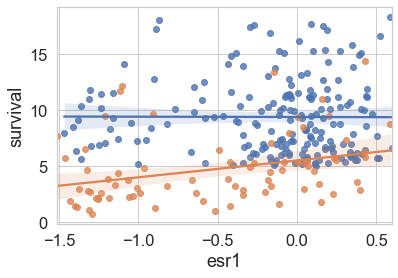

alive slope =  -0.02703256350628837 r_value =  -0.003931789708053483
death slope =  1.5049956115141556 r_value =  0.30796128164550884


In [146]:
# compare selected genes between all individuals in the alive and death groups
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_alive['esr1'],nki_bc_alive['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_death['esr1'],nki_bc_death['survival'])
_ = sns.regplot(nki_bc_alive['esr1'], nki_bc_alive['survival'])
_ = sns.regplot(nki_bc_death['esr1'], nki_bc_death['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

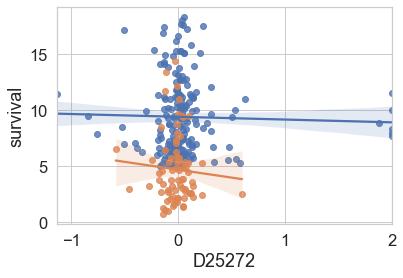

alive slope =  -0.2468619438717299 r_value =  -0.029063671181187793
death slope =  -1.4057233987983502 r_value =  -0.0664547454973816


In [147]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_alive['D25272'],nki_bc_alive['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_death['D25272'],nki_bc_death['survival'])
_ = sns.regplot(nki_bc_alive['D25272'], nki_bc_alive['survival'])
_ = sns.regplot(nki_bc_death['D25272'], nki_bc_death['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

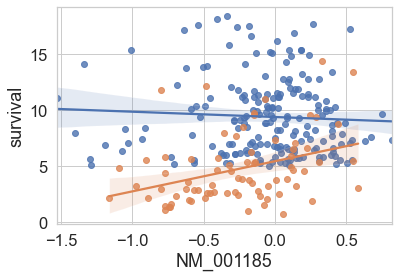

alive slope =  -0.47340207194945205 r_value =  -0.05811810790314634
death slope =  2.6929150075895305 r_value =  0.35669108248811787


In [148]:
# this gene was identified above as one that has a corelation of 0.2 or greater between expression in the death group and survival
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_alive['NM_001185'],nki_bc_alive['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_death['NM_001185'],nki_bc_death['survival'])
_ = sns.regplot(nki_bc_alive['NM_001185'], nki_bc_alive['survival'])
_ = sns.regplot(nki_bc_death['NM_001185'], nki_bc_death['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

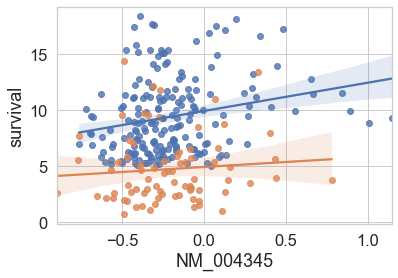

alive slope =  2.522371884794634 r_value =  0.2312870571390089
death slope =  0.888864590132867 r_value =  0.08687466992521631


In [149]:
# this gene was identified above as one that has a corelation of 0.2 or greater between expression in the alive group and survival
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_alive['NM_004345'],nki_bc_alive['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_death['NM_004345'],nki_bc_death['survival'])
_ = sns.regplot(nki_bc_alive['NM_004345'], nki_bc_alive['survival'])
_ = sns.regplot(nki_bc_death['NM_004345'], nki_bc_death['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

In [161]:
# create alive df that has only survival and genes
nki_bc_alive_surv_genes = nki_bc_alive.drop(['age', 'eventdeath', 'eventdeath2', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [162]:
# check df to confirm correct columns
nki_bc_alive_surv_genes.head()

,survival,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,14.817248,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,14.261465,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,6.644764,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,7.748118,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,6.436687,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [163]:
# create death df that has only survival and genes
nki_bc_death_surv_genes = nki_bc_death.drop(['age', 'eventdeath', 'eventdeath2', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [164]:
# Divide alive and death groups into 3 year bins and look at regression lines for survial and specific genes
surv_group_1a = nki_bc_alive['survival_group'] == '1'
nki_bc_1a = nki_bc_alive[surv_group_1a]
alive1=nki_bc_1a['survival'].count()
print('surviv_group_alive_1 n = ', alive1)

surviv_group_alive_1 n =  0


In [165]:
surv_group_2a = nki_bc_alive['survival_group'] == '2'
nki_bc_2a = nki_bc_alive[surv_group_2a]
alive2=nki_bc_2a['survival'].count()
print('surviv_group_alive_2 n = ', alive2)

surviv_group_alive_2 n =  29


In [166]:
surv_group_2d = nki_bc_death['survival_group'] == '2'
nki_bc_2d = nki_bc_death[surv_group_2d]
death2=nki_bc_2d['survival'].count()
print('surviv_group_death_2 n = ', death2)

surviv_group_death_2 n =  30


In [167]:
nki_bc_2a_surv_genes = nki_bc_2a.drop(['age', 'eventdeath', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

In [168]:
nki_bc_2d_surv_genes = nki_bc_2d.drop(['age', 'eventdeath', 'survival_group', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil'], axis = 1)

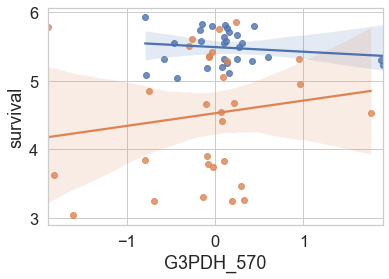

alive slope =  -0.06730399833583332 r_value =  -0.1553086259864782
death slope =  0.1846796021863117 r_value =  0.15237968024572135


In [169]:
# checking individual genes
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_2a_surv_genes['G3PDH_570'],nki_bc_2a_surv_genes['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_2d_surv_genes['G3PDH_570'],nki_bc_2d_surv_genes['survival'])
_ = sns.regplot(nki_bc_2a_surv_genes['G3PDH_570'], nki_bc_2a_surv_genes['survival'])
_ = sns.regplot(nki_bc_2d_surv_genes['G3PDH_570'], nki_bc_2d_surv_genes['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

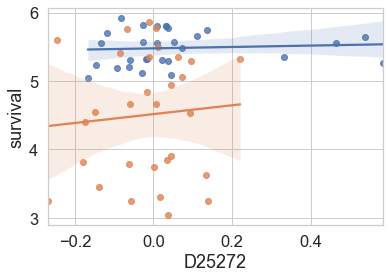

alive slope =  0.10112950870901581 r_value =  0.07524932163566214
death slope =  0.6486099099612962 r_value =  0.08053302760714495


In [170]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_2a_surv_genes['D25272'],nki_bc_2a_surv_genes['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_2d_surv_genes['D25272'],nki_bc_2d_surv_genes['survival'])
_ = sns.regplot(nki_bc_2a_surv_genes['D25272'], nki_bc_2a_surv_genes['survival'])
_ = sns.regplot(nki_bc_2d_surv_genes['D25272'], nki_bc_2d_surv_genes['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

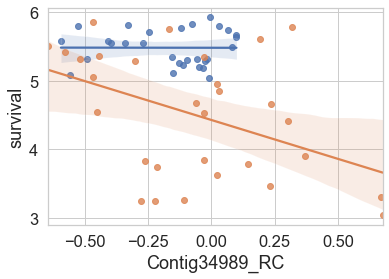

alive slope =  -0.003636195829266508 r_value =  -0.00292141850138492
death slope =  -1.1382167210587282 r_value =  -0.4335187985889591


In [171]:
# Taking closer look at one of the genes. 
slope, intercept, r_value, p_value, std_err = stats.linregress(nki_bc_2a_surv_genes['Contig34989_RC'],nki_bc_2a_surv_genes['survival'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(nki_bc_2d_surv_genes['Contig34989_RC'],nki_bc_2d_surv_genes['survival'])
_ = sns.regplot(nki_bc_2a_surv_genes['Contig34989_RC'], nki_bc_2a_surv_genes['survival'])
_ = sns.regplot(nki_bc_2d_surv_genes['Contig34989_RC'], nki_bc_2d_surv_genes['survival'])
plt.show()
print('alive slope = ', slope, 'r_value = ', r_value)
print('death slope = ', slope2, 'r_value = ', r_value2)

Using the expression levels of the gene above, there is a cutoff for the alive group that does not exhibit levels above ~0.1, while the death group has close to 10 individuals who display levels of  0.1-greater than 0.6. Tthis may provide information on survivorship between 3 and 6 years after diagnosis in individials with breast cancer.

#### Summary:
Based on the above exploratory analyses, survival time/survivorship could be modeled using several features. These include pathological grade and some gene expression levels. Furture analyses can explore characteristics such as the difference in gene expression levels of the individuals with the ten highest levels and ten lowest levels between the alive and death groups.

In [172]:
nki_bc_death_genes.head()

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
9,-1.324176,-0.104224,-0.427800,-0.003295,-0.060694,-0.253229,-0.165621,-1.110337,-0.726393,-0.392540,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580
12,-0.162349,0.190224,0.157729,-0.110239,-0.022853,0.061682,0.468902,-0.226406,-0.237759,-0.599157,...,0.115984,-0.364999,0.055677,-0.631157,0.231151,-0.058433,0.080366,-0.285472,-0.238604,0.370100
14,-0.661729,0.096640,-0.258875,-0.105883,-0.178748,0.368888,-0.255147,-0.518845,-0.928234,-0.821369,...,0.486894,-0.307986,-0.019385,-0.074633,-0.262925,-0.032161,-0.337821,0.257535,0.385928,-0.755791
16,-0.435775,-0.799154,0.081538,-0.013132,0.034742,-0.504213,-0.048261,-0.272853,-0.514442,0.007723,...,0.340210,0.209754,0.011824,-0.087450,-0.167448,-0.015781,0.234903,-0.003074,-0.404941,-0.182364
19,-1.255379,-0.006519,-0.201504,-0.120400,-0.077757,1.050243,0.018297,-0.534194,-0.737589,0.125992,...,0.148252,0.026755,0.143584,-0.766902,-0.022762,-0.019199,0.121523,0.162393,-0.893341,0.334673


In [173]:
nki_bc_alive_genes.head()

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [174]:
alive_mean = nki_bc_alive_genes.mean()
alive_mean.head()

esr1             -0.144011
G3PDH_570        -0.026602
Contig45645_RC   -0.022899
Contig44916_RC   -0.013676
D25272            0.059860
dtype: float64

In [175]:
death_mean = nki_bc_death_genes.mean()
death_mean.head()

esr1             -0.529167
G3PDH_570        -0.021488
Contig45645_RC   -0.090801
Contig44916_RC   -0.032987
D25272           -0.020858
dtype: float64

In [180]:
result = pd.concat([alive_mean, death_mean], axis=1)
result.rename(columns={0: 'Survived', 1: 'Did not survive'}, inplace=True)

In [184]:
result.head()

,Survived,Did not survive
esr1,-0.144011,-0.529167
G3PDH_570,-0.026602,-0.021488
Contig45645_RC,-0.022899,-0.090801
Contig44916_RC,-0.013676,-0.032987
D25272,0.059860,-0.020858


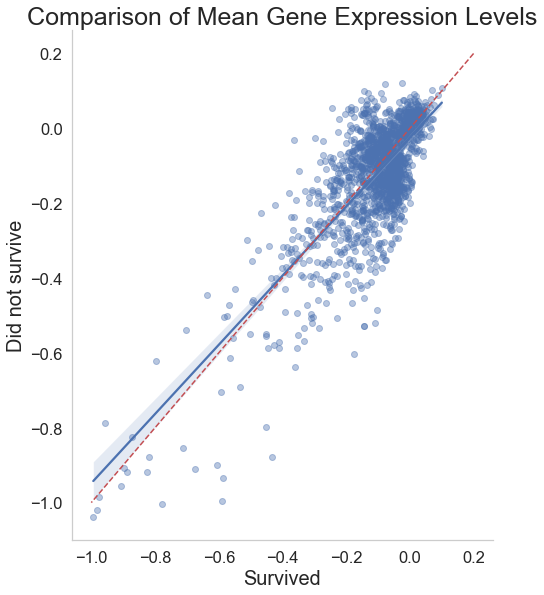

In [203]:

g = sns.pairplot(result,kind='reg', y_vars=['Did not survive'], x_vars=['Survived'], plot_kws= {'scatter_kws': {'alpha': 0.4}})
g.fig.set_size_inches(10,10)
plt.plot([0.2, -1], [0.2, -1],'r--')
plt.grid(False)
plt.xlabel('Survived', fontsize = 20)
plt.ylabel('Did not survive', fontsize = 20)
plt.title('Comparison of Mean Gene Expression Levels', fontsize = 25)
plt.savefig('Gene pairplot.png', transparent=True)